In [2]:
pip install missingno  #Install missingno library which offers a very nice way to visualize the distribution of NaN values.


Note: you may need to restart the kernel to use updated packages.


In [3]:
#Import All Other Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime   #Python Datetime module supplies classes to work with date and time.
import missingno as msno

warnings.filterwarnings("ignore")

In [4]:
#Load Data
df = pd.read_csv("loan.csv")
df.head()
#df.shape  #39717 rows and 111 columns

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

### For details of each column - Pl refer Data_Dictionary.xlsx
#### Once we study the columns we would find :
    - There are broadly three types of variables.
    - Those which are related to the applicant (demographic variables such as 'emp_title' ,'emp_length',    'zip_code',  'addr_state' etc. ) 
    - Loan characteristics (loan amount, interest rate, purpose of loan etc.) and 
    -Customer behavior variables ( which are generated after the loan is approved such as delinquent 2 years, revolving balance, next payment date etc.)

## EDA: Exploratory data analysis

In [5]:
df.info(verbose=True)  #use verbose as argument to info, it gives option to print the full summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

### First check what all columns we can simply remove as they will not contribute to analysis :  
    - As Customer behavior variables are not available at the time of loan application - Remove them.
    - delinq_2yrs, earliest_cr_line, inq_last_6mths, open_acc, pub_rec, revol_bal, revol_util, total_acc, out_prncp, out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,next_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type , 'mths_since_last_delinq','mths_since_last_record','chargeoff_within_12_mths'

In [6]:
#Remove the above mentioned columns
df.drop(['delinq_2yrs', "earliest_cr_line",'inq_last_6mths','open_acc','pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','next_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type', 'mths_since_last_delinq' , 'mths_since_last_record' , 'chargeoff_within_12_mths'], axis = 1, inplace = True)
df.head()


id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 86 columns]

### Check for null values

<AxesSubplot:>

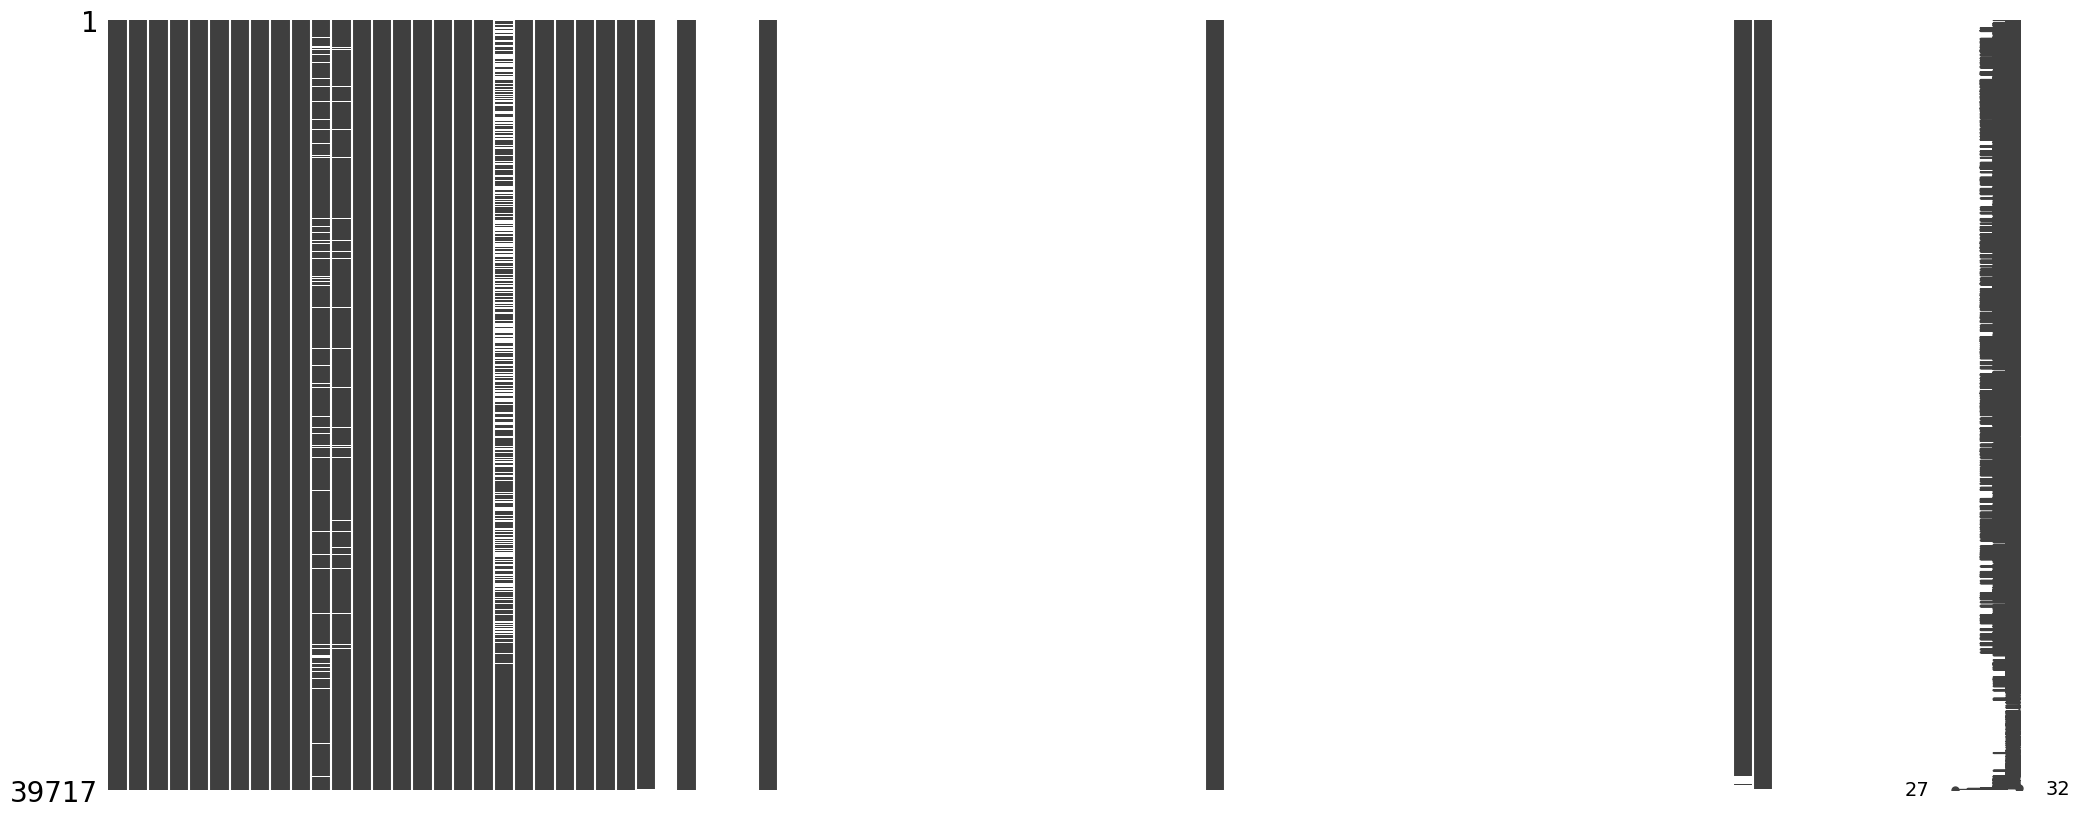

In [7]:
# Visualize missing values as a matrix
msno.matrix(df)

#### We could clearly see from above graph :
    - Lot of columns have all null values. 
    - Few Columns have very large missing values. 
    - Few Columns have less missing values.

In [8]:
#Check for null values count
print(df.isna().sum())

print('Number of empty Rows:', df.isna().all(axis=1).sum())  

print('Number of empty Columns:' , df.isna().all(axis=0).sum() ) #Check for columns having all null values


id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 86, dtype: int64
Number of empty Rows: 0
Number of empty Columns: 54


#### <font color='black'>Check above info : </font> 
    - There are lot of columns which have all values as null 
#### <font color='black'>Remove them as they will not contribute to analysis </font> 

In [9]:
#Remove columns having all values as null as they will not contribute to analysis
#Drop the columns where all elements are NaN
df.dropna(axis=1 , how='all' , inplace = True)    
df.shape       #Remaining Columns now - 32. Rest are dropped.

#Note : 
#df.dropna(axis =1)  #will drop whole column even if any single value is null



(39717, 32)

#### <font color='black'>Check.. there are some columns which have single values mostly .. </font> 

#### <font color='black'>They cannot contribute to our analysis . Remove them ... </font> 


In [10]:
print ( df[['pymnt_plan']].value_counts() )  #Total no. of unique value = Total # of rows
print ( df[['initial_list_status']].value_counts() ) 
print ( df[['collections_12_mths_ex_med']].value_counts() ) 
print ( df[['acc_now_delinq']].value_counts() ) 
print ( df[['pub_rec_bankruptcies']].value_counts() )
print ( df[['tax_liens']].value_counts() )
print ( df[['delinq_amnt']].value_counts() )


pymnt_plan
n             39717
dtype: int64
initial_list_status
f                      39717
dtype: int64
collections_12_mths_ex_med
0.0                           39661
dtype: int64
acc_now_delinq
0                 39717
dtype: int64
pub_rec_bankruptcies
0.0                     37339
1.0                      1674
2.0                         7
dtype: int64
tax_liens
0.0          39678
dtype: int64
delinq_amnt
0              39717
dtype: int64


####  For above columns Total no. of unique value = Total # of rows => Means all values in whole column are same

In [11]:
#Remove the above columns having all single values
df.drop(['pymnt_plan', "initial_list_status",'collections_12_mths_ex_med','policy_code','acc_now_delinq', 'pub_rec_bankruptcies', 'tax_liens', 'delinq_amnt'], axis = 1, inplace = True)
df.head()



id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... verification_status issue_d  \
0   10.65%       162.87     B        B2  ...            Verified  Dec-11   
1   15.27%        59.83     C        C4  ...     Source Verified  Dec-11   
2   15.96%        84.33     C        C5  ...        Not Verified  Dec-11   
3   13.49%       339.31     C        C1  ...     Source Verified  Dec-11   
4   12.69%        67.79     B        B5  ...     Source Verified  Dec-11   

   loan_status                                                url  \
0   Fully Paid  https://lendingclub.com/browse/loanDetail.acti...   
1  Charged Off  https://lendingclub.com/browse/loanDetail.acti...   
2   Fully Paid  https://lendingclub.com/browse/loanDetail.acti...   
3   Fully Paid  https://lendingclub.com/browse/loanDetail.acti...   
4      Current  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  
0              Computer    860xx         AZ  27.65  
1                  bike    309xx         GA   1.00  
2  real estate business    606xx         IL   8.72  
3              personel    917xx         CA  20.00  
4              Personal    972xx         OR  17.94  

[5 rows x 24 columns]

#### <font color='black'>Again check for null values... Still there are columns having lot of null values as they will not contribute in analysis </font> 

#### <font color='black'>Remove them </font> 

In [12]:

df.isnull().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title               2459
emp_length              1075
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
url                        0
desc                   12940
purpose                    0
title                     11
zip_code                   0
addr_state                 0
dti                        0
dtype: int64

#### Remove :
Note : We are analyzing the driving factors that will help us to determine the loan defaulting variables
   - Remove more columns which can not contribute to our analysis after 'all null and 'all single value' cleanup.     
    - emp_title , desc , title.
    - Also there are some columns such as "id", "member_id", "url", "zip_code", "addr_state" etc. which will not contribute to the loan defaulting as they are irrelevant. 

In [13]:


df.drop(['emp_title','desc','title'  ], axis = 1, inplace = True)

#Also remove "id", "member_id", "url" etc.
df.drop(['id','member_id', 'url','zip_code' ,'addr_state'] , axis =1 , inplace= True)


#### Remove last irrelevant Column : ]
 - "funded_amnt" is also not needed as we have "funded_amnt_inv" as this is the final disbursed amount , we can remove the earlier column.
 

In [14]:
#df.drop(["funded_amnt"], axis = 1, inplace = True)


In [15]:
print( df.shape ) 
df.columns

(39717, 16)


Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti'],
      dtype='object')

###  Filter the loan status .... loan_status = current is not relevant for our analysis as they are on going loan
    - We should be interested in Fully Paid and Charged Off Loan

In [16]:
df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [17]:
#Remove the ongoing loan
df = df[df['loan_status'] != 'Current']
df.shape

(38577, 16)

In [18]:
df.isnull().sum()

loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length             1033
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
dtype: int64

### Check for missing values for the remaining columns
    - emp_length  1033 missing values. Percentage wise its about ~2.6% missing values which is low

#### Two Options are there : 
    1. Simply remove all rows having missing values of emp_length.
    2. Missing value imputation :
        - Fill emp_length with most unique value
        - Use fancyimpute libray and use K-Nearest Neighbor module - which finds out the similar data points and   take the average of all the points to fill in the missing values.


In [19]:
# We did not remove emp_length : employment tenure - as this might be relevant for analysis.
#print ( df['emp_length'].mode()[0]  )  #Extract the most unique value

#df['emp_length'].fillna(df['emp_length'].mode()[0] , inplace=True)  #if we don't use inplace=True then assign to df again


#### We are going with Option 1: Filter the rows having missing values of emp_length

In [20]:
df = df[df['emp_length'].notna()]

In [21]:
print ( df['emp_length'].isnull().sum() ) # No null values now.
print ( df.shape )

0
(37544, 16)


## Data Manipulation :
#### Analyze each column to get the feel ... And try see what all can be converted to numerical int.
    - Check for term (only two data 36 months and 60 months) like the categorical variable as 36 and 60 can not be used in any sort of numerical analysis as it is not any continuous values
    - int_rate is % 
    - emp_length [employment length] can be converted to like 10+ years = 10 , <1 year = 0 

In [22]:
df['int_rate'].head()

0    10.65%
1    15.27%
2    15.96%
3    13.49%
5     7.90%
Name: int_rate, dtype: object

In [23]:
#Convert int_rate to numeric data
df['int_rate'] = df['int_rate'].apply(lambda x: float(str(x)[:-1]) )   #excluding -1 last index


In [24]:
df['emp_length'].value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [25]:
#Convert emp_length desired format 10+ years = 10 , < 1 year =0
def convert_emp(st):
    if '<' in st:
        return 0
    elif '+' in st:
        return str(st).split('+')[0]  #split does not take regex
    else:
        return str(st).split(' ')[0]
        

df['emp_length'] = df['emp_length'].apply(lambda x : convert_emp(x))   #call function



In [26]:
print ( df['emp_length'].value_counts() )  #Check if values are converted successfully
df.head()


10    8488
0     4508
2     4291
3     4012
4     3342
5     3194
1     3169
6     2168
7     1711
8     1435
9     1226
Name: emp_length, dtype: int64


loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  installment  \
0       5000         5000           4975.0   36 months     10.65       162.87   
1       2500         2500           2500.0   60 months     15.27        59.83   
2       2400         2400           2400.0   36 months     15.96        84.33   
3      10000        10000          10000.0   36 months     13.49       339.31   
5       5000         5000           5000.0   36 months      7.90       156.46   

  grade sub_grade emp_length home_ownership  annual_inc verification_status  \
0     B        B2         10           RENT     24000.0            Verified   
1     C        C4          0           RENT     30000.0     Source Verified   
2     C        C5         10           RENT     12252.0        Not Verified   
3     C        C1         10           RENT     49200.0     Source Verified   
5     A        A4          3           RENT     36000.0     Source Verified   

  issue_d  loan_status         purpose    dti  
0  Dec-11   Fully Paid     credit_card  27.65  
1  Dec-11  Charged Off             car   1.00  
2  Dec-11   Fully Paid  small_business   8.72  
3  Dec-11   Fully Paid           other  20.00  
5  Dec-11   Fully Paid         wedding  11.20

## Check for Outliers for numerical values .... 
    - Check for annual_inc 
    - loan_amnt
    - funded_amnt_inv
    - installment
    - dti

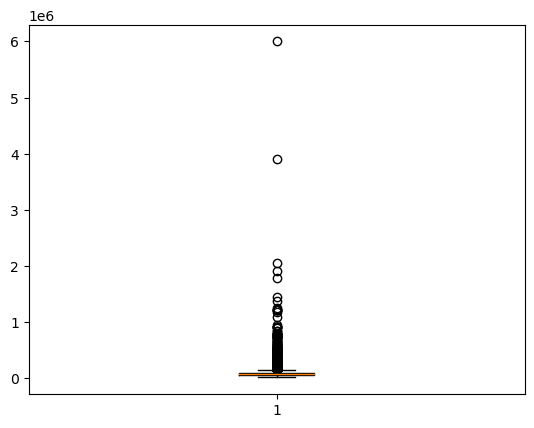

In [27]:
#sns.boxplot(df['annual_inc'])
plt.boxplot(df['annual_inc'])  #There is clearly outliers
plt.show()

#### Clearly there are outliers - take 95 percentile and remove other values

In [28]:
#Filter values below 95 percentile
annual_inc_95_per = df['annual_inc'].quantile(0.95)  #Use quantile(0.95) to fetch percentile
df = df[df['annual_inc'] <= annual_inc_95_per]  #Filter values below 95 percentile


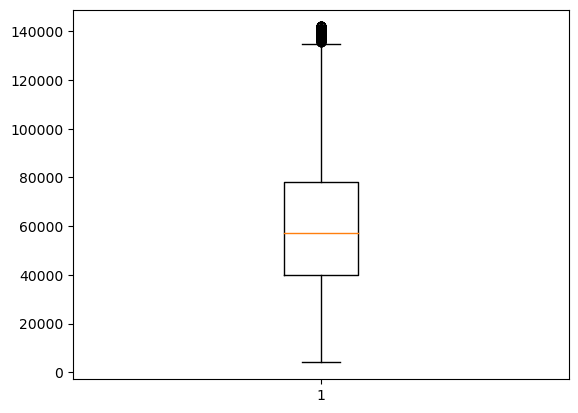

In [29]:

plt.boxplot(df['annual_inc'])  #This is looking good now. No outliers
plt.show()


#### Check for loan_amnt

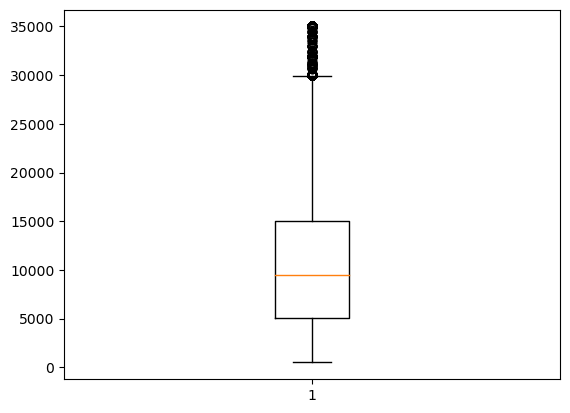

0.75    15000.0
0.90    20000.0
0.95    25000.0
0.98    30000.0
0.99    35000.0
1.00    35000.0
Name: loan_amnt, dtype: float64

In [30]:

plt.boxplot(df['loan_amnt'])   #Looking data is uniformly distributed. Don't have outliers
plt.show()

df['loan_amnt'].quantile([0.75,0.90,0.95, 0.98, 0.99, 1.0]) #Print all percentile wise data to analyze the distribution
#We have observed data is distributed uniformly ...so no outliers here


#### Check for funded_amnt_inv

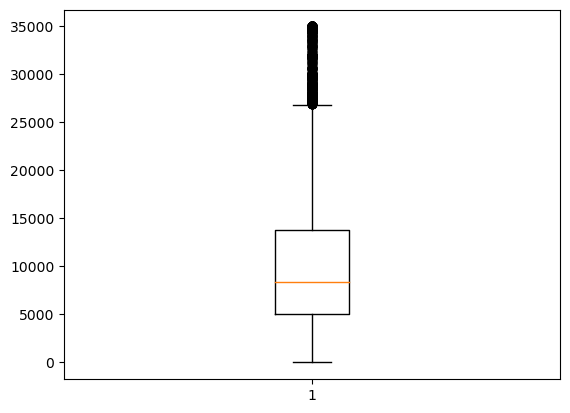

0.75    13749.998585
0.90    19770.806164
0.95    23950.050847
0.98    27975.000000
0.99    31981.500000
1.00    35000.000000
Name: funded_amnt_inv, dtype: float64

In [31]:

plt.boxplot(df['funded_amnt_inv'])   #Looking data is uniformly distributed. Don't have outliers
plt.show()

df['funded_amnt_inv'].quantile([0.75,0.90,0.95, 0.98, 0.99, 1.0]) #Print all percentile wise data to analyze the distribution
#We have observed data is distributed uniformly ...so no outliers here


#### Check for installment

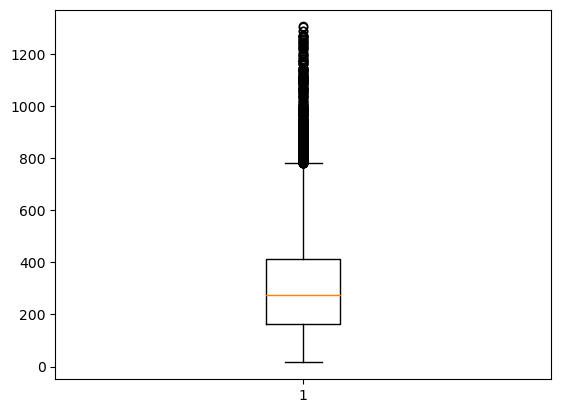

0.75     411.4100
0.90     591.5040
0.95     709.8890
0.98     849.0912
0.99     901.0100
1.00    1305.1900
Name: installment, dtype: float64

In [32]:

plt.boxplot(df['installment'])   #Looking data is uniformly distributed/continuous. Don't have outliers
plt.show()

df['installment'].quantile([0.75,0.90,0.95, 0.98, 0.99, 1.0]) #Print all percentile wise data to analyze the distribution
#We have observed data is distributed uniformly ...so no outliers here


#### Check for dti

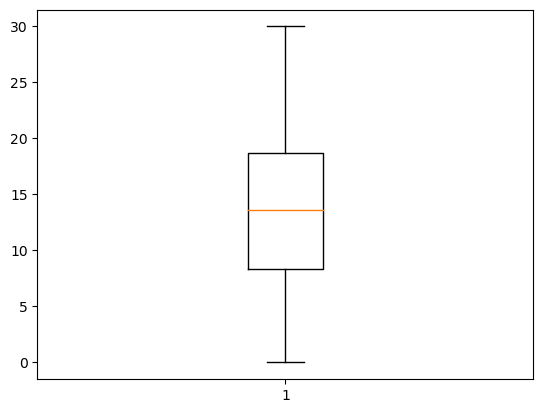

0.75    18.70
0.90    22.39
0.95    23.85
0.98    24.87
0.99    26.62
1.00    29.99
Name: dti, dtype: float64

In [33]:

plt.boxplot(df['dti'])   #Looking data is uniformly distributed/continuous and with in max/min boundary. Don't have outliers
plt.show()

df['dti'].quantile([0.75,0.90,0.95, 0.98, 0.99, 1.0]) #Print all percentile wise data to analyze the distribution
#We have observed data is distributed uniformly ...so no outliers here


In [34]:
df['verification_status'].head()

0           Verified
1    Source Verified
2       Not Verified
3    Source Verified
5    Source Verified
Name: verification_status, dtype: object

## Check for Categorical values .... 
    -term is having only 2 values - should be the category 
    -grade
    -subgrade
    -home_ownership
    -loan_status
    -purpose
    -verification_status 
    -emp_length 

In [35]:
df.head()

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  installment  \
0       5000         5000           4975.0   36 months     10.65       162.87   
1       2500         2500           2500.0   60 months     15.27        59.83   
2       2400         2400           2400.0   36 months     15.96        84.33   
3      10000        10000          10000.0   36 months     13.49       339.31   
5       5000         5000           5000.0   36 months      7.90       156.46   

  grade sub_grade emp_length home_ownership  annual_inc verification_status  \
0     B        B2         10           RENT     24000.0            Verified   
1     C        C4          0           RENT     30000.0     Source Verified   
2     C        C5         10           RENT     12252.0        Not Verified   
3     C        C1         10           RENT     49200.0     Source Verified   
5     A        A4          3           RENT     36000.0     Source Verified   

  issue_d  loan_status         purpose    dti  
0  Dec-11   Fully Paid     credit_card  27.65  
1  Dec-11  Charged Off             car   1.00  
2  Dec-11   Fully Paid  small_business   8.72  
3  Dec-11   Fully Paid           other  20.00  
5  Dec-11   Fully Paid         wedding  11.20

#### Plot the bar graph of term

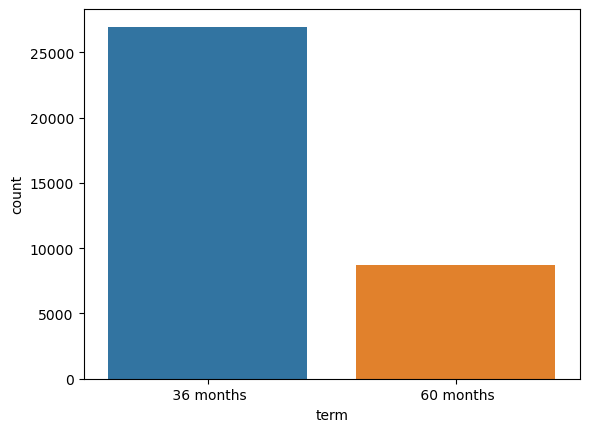

In [36]:
#term - Print total no. of counts of loan for 36 months and 60 months
#df['term'].value_counts().plot.bar()   #Does groupby on categorical value and count the grouped value
sns.countplot(df['term'])  # OR we can use sns.countplot()  to construct bar plot for count of categorical variable
plt.show()


## <font color='blue'> Insights from above graph : </font>
    1. Most applicants have applied for 36 months tenure
 

#### Plot the bar plot of grade

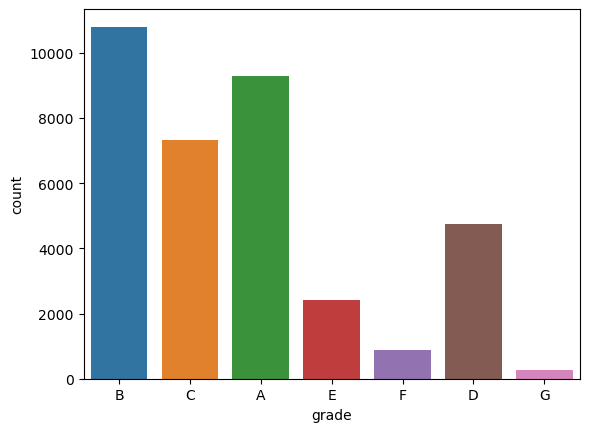

In [37]:
#Check for grade
sns.countplot(df['grade'])  
plt.show()

## <font color='blue'> Insights from above graph : </font>
    1. Most applicants have been alloted A,B,C grades
 

#### Plot the bar plot of loan_status

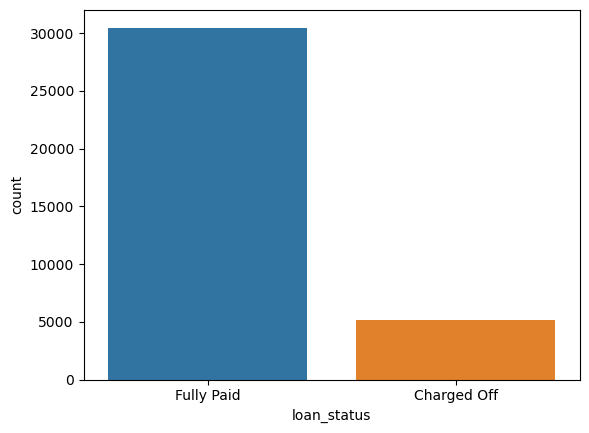

In [38]:
#Check for loan_status
sns.countplot(df['loan_status'])
plt.show()

## <font color='blue'> Insights from above graph : </font>
    1. In the given dataset, Major loans are Fully Paid
 

#### Plot the bar plot of purpose

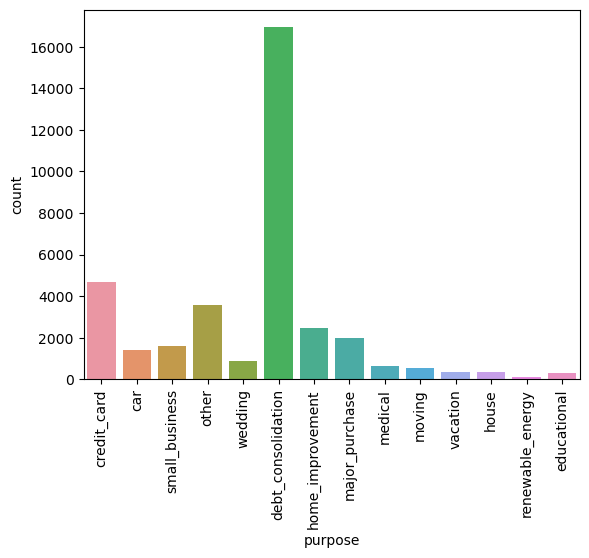

In [39]:
#Check for purpose
sns.countplot(df['purpose'])     
plt.xticks(rotation=90)  
plt.show()


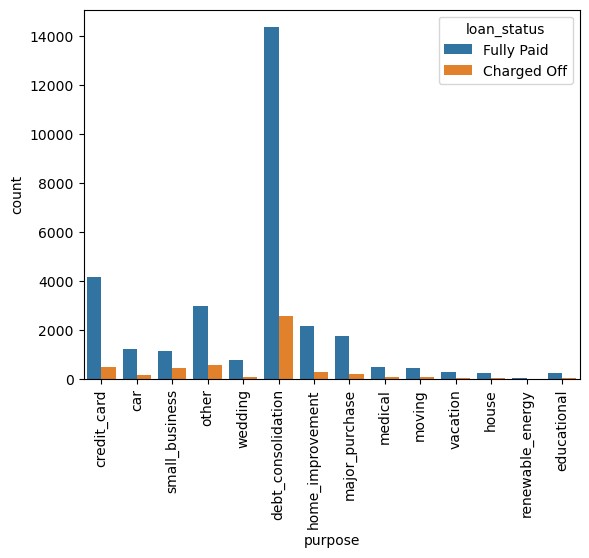

In [77]:
sns.countplot(df['purpose'] , hue=df['loan_status'])     
plt.xticks(rotation=90)  
plt.show()

## <font color='blue'> Insights from above graphs : </font>
    1. Most of the applicants applied loan for debt_consolidation as purpose.
    2. Purpose as debt_consolidation has highest fully paid loan AND also has highest defaulted loans as well.
 

#### Plot the count plot for grade - LC assigned loan grade . 
    - Check the grades for loan defaulters and fully paid
    - Check grades with sub_grades for defaulters

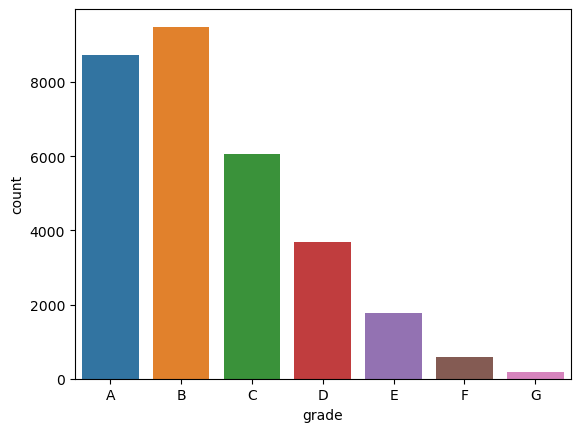

In [40]:
#Fully Paid Grades
sns.countplot(df[ df['loan_status'] !='Charged Off' ]['grade'] , order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.show()

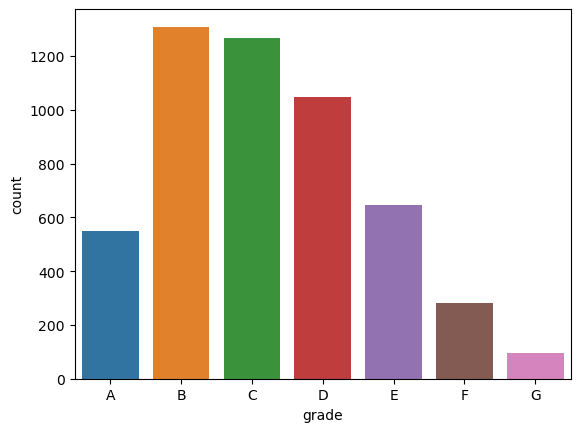

In [41]:
#Charged Off Grades
sns.countplot(df[ df['loan_status'] =='Charged Off' ]['grade'] , order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.show()

## <font color='blue'> Insights from above graph : </font>
    1. If LC assigned grade is A - applicant is less likely to be defaulter.
 

In [42]:
# Check subgrades
df['sub_grade'] = df['sub_grade'].apply(lambda x : int(x[-1]) )
df['sub_grade'].head()

0    2
1    4
2    5
3    1
5    4
Name: sub_grade, dtype: int64

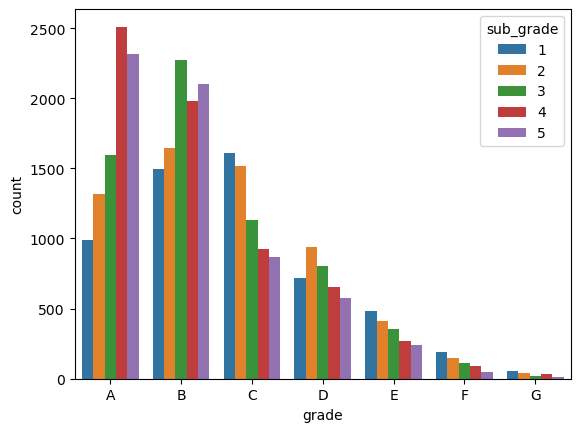

In [43]:
#Fully Paid Grades with subgrades ... Below will do groupBy based on grade and subgrade
sns.countplot(df[ df['loan_status'] !='Charged Off' ]['grade'] , order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue=df['sub_grade'])
plt.show()



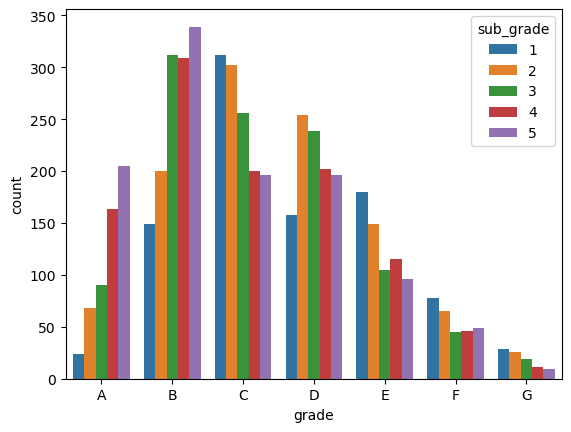

In [44]:
#Charged Off Grades with subgrades ... Below will do groupBy based on grade and subgrade
sns.countplot(df[ df['loan_status'] =='Charged Off' ]['grade'] , order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue=df['sub_grade'])
plt.show()



## <font color='blue'> Insights from above graphs : </font>
    1. Within A if subgrade is increasing ( A1 , A2 ,A3 ,A4 ,A5 ) - applicant is more likely to be defaulter.
    2. Most chances of being defaulter is with Grade B and sub-grade - B5
 

#### Plot the bar plot/count plot of home_ownership for charged off loans

In [45]:
# Check home_ownership unique value
df['home_ownership'].value_counts()     #3 NONE are present. 

RENT        17638
MORTGAGE    15289
OWN          2652
OTHER          93
NONE            3
Name: home_ownership, dtype: int64

In [46]:
#Replace 3 NONE with most unique value
df['home_ownership'].replace('NONE' , df['home_ownership'].mode()[0] ,inplace=True)  #use inplace=True if we are not using assignent
df['home_ownership'].value_counts()


RENT        17641
MORTGAGE    15289
OWN          2652
OTHER          93
Name: home_ownership, dtype: int64

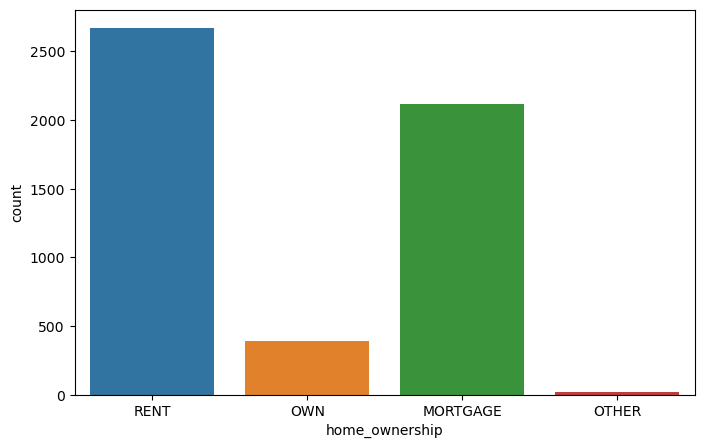

In [47]:
plt.figure(figsize=[8,5])
sns.countplot(df[df['loan_status'] == 'Charged Off']['home_ownership'] ) 
plt.show()


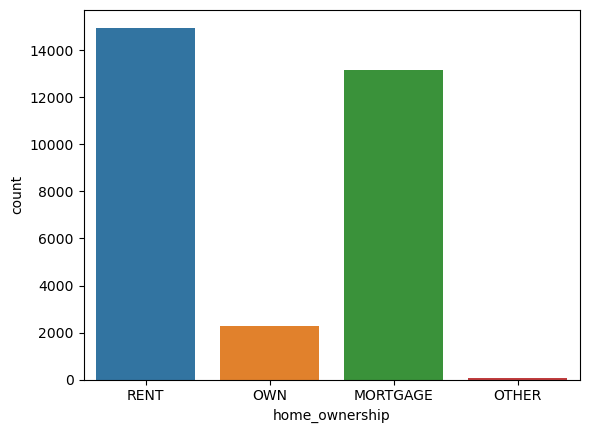

In [48]:
sns.countplot(df[df['loan_status'] != 'Charged Off']['home_ownership'] ) 
plt.show()


## <font color='blue'> Insights from above graphs : </font>
    1. If applicant is on RENT and MORTGAGE he is more likely to be defaulter.
 

#### Plot the count plot for categorical variable term , verification_status ,emp_length  for Charged Off loan

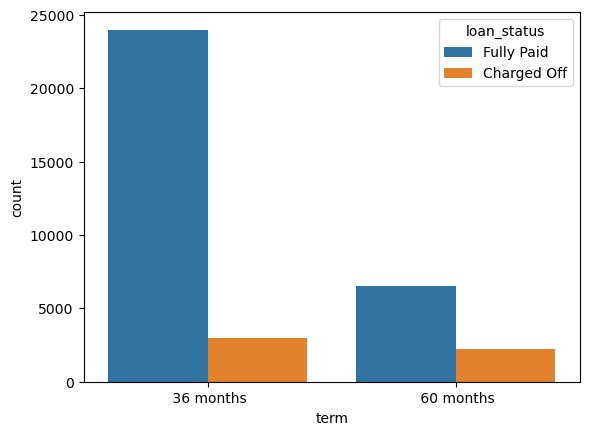

In [76]:
sns.countplot( df['term'], hue=df['loan_status'] )
plt.show()

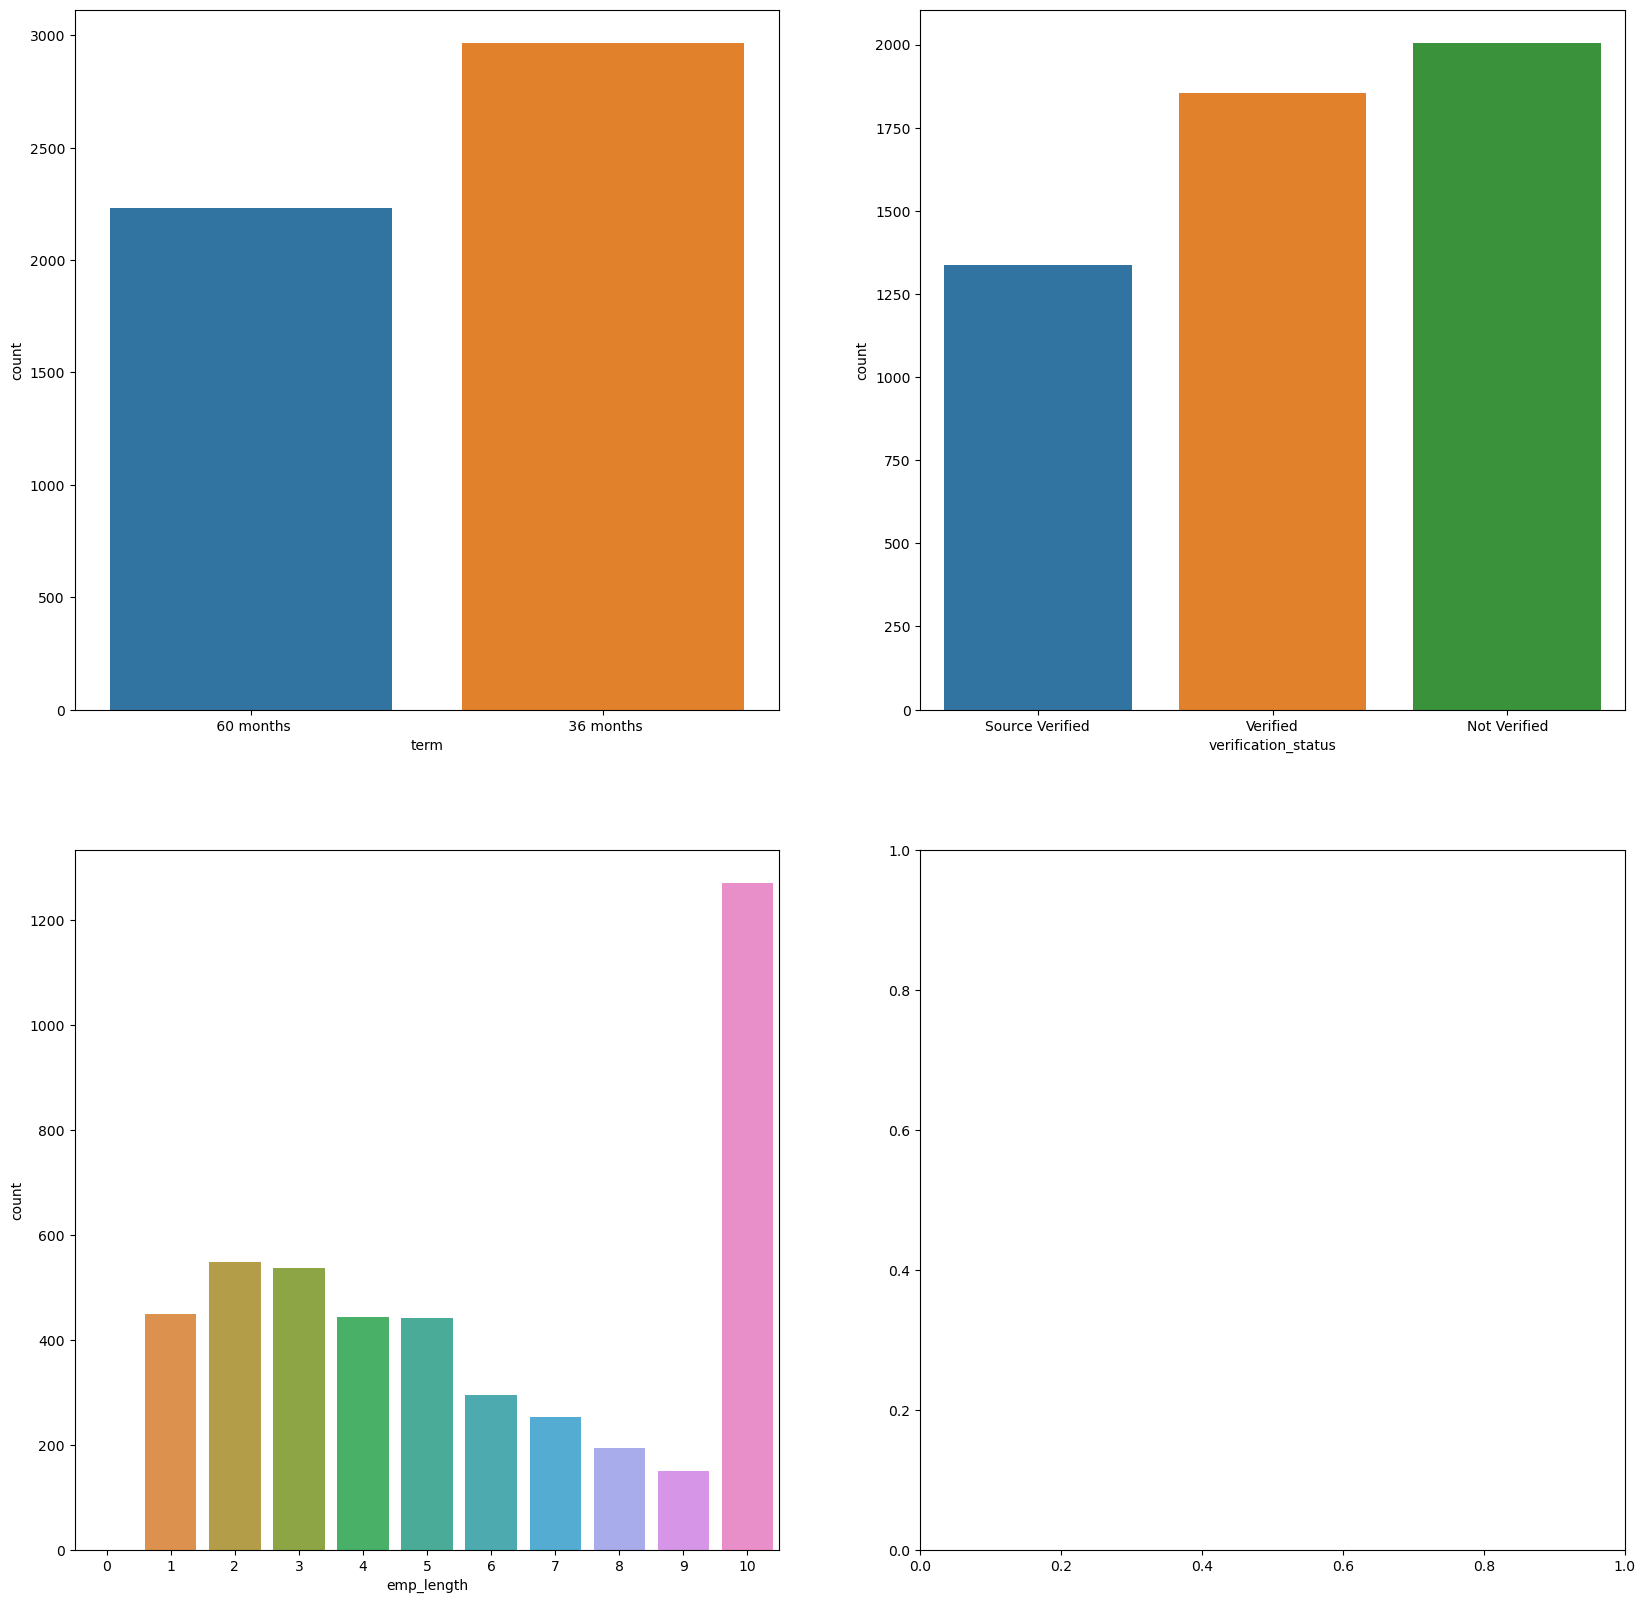

In [50]:
fig, axes = plt.subplots(2,2, figsize=(20, 20))  #subplot of 1X2

sns.countplot( df[df['loan_status'] == 'Charged Off']['term'] , ax=axes[0,0])

sns.countplot( df[df['loan_status'] == 'Charged Off']['verification_status'], ax = axes[0,1])

sns.countplot( df[df['loan_status'] == 'Charged Off']['emp_length'] , ax=axes[1,0] , order= ['0','1','2','3','4','5','6','7','8','9','10'])

plt.show()

## <font color='blue'> Insights from above graphs : </font>
    1. The Loans taken for 36 month term are much more than 60 months and have lower chance of defaulting.
    2. If loan is not verified -  he is more likely to be defaulter.
    3. If employment length of applicant is >=10 years , he is more likely to be defaulter
 

#### Plot the hist plot for numerical columns for Charged Off loan :  (To see the distribution)
    - loan_amnt
    - funded_amnt_inv
    - int_rate
    - annual_inc
    - installment
    - dti

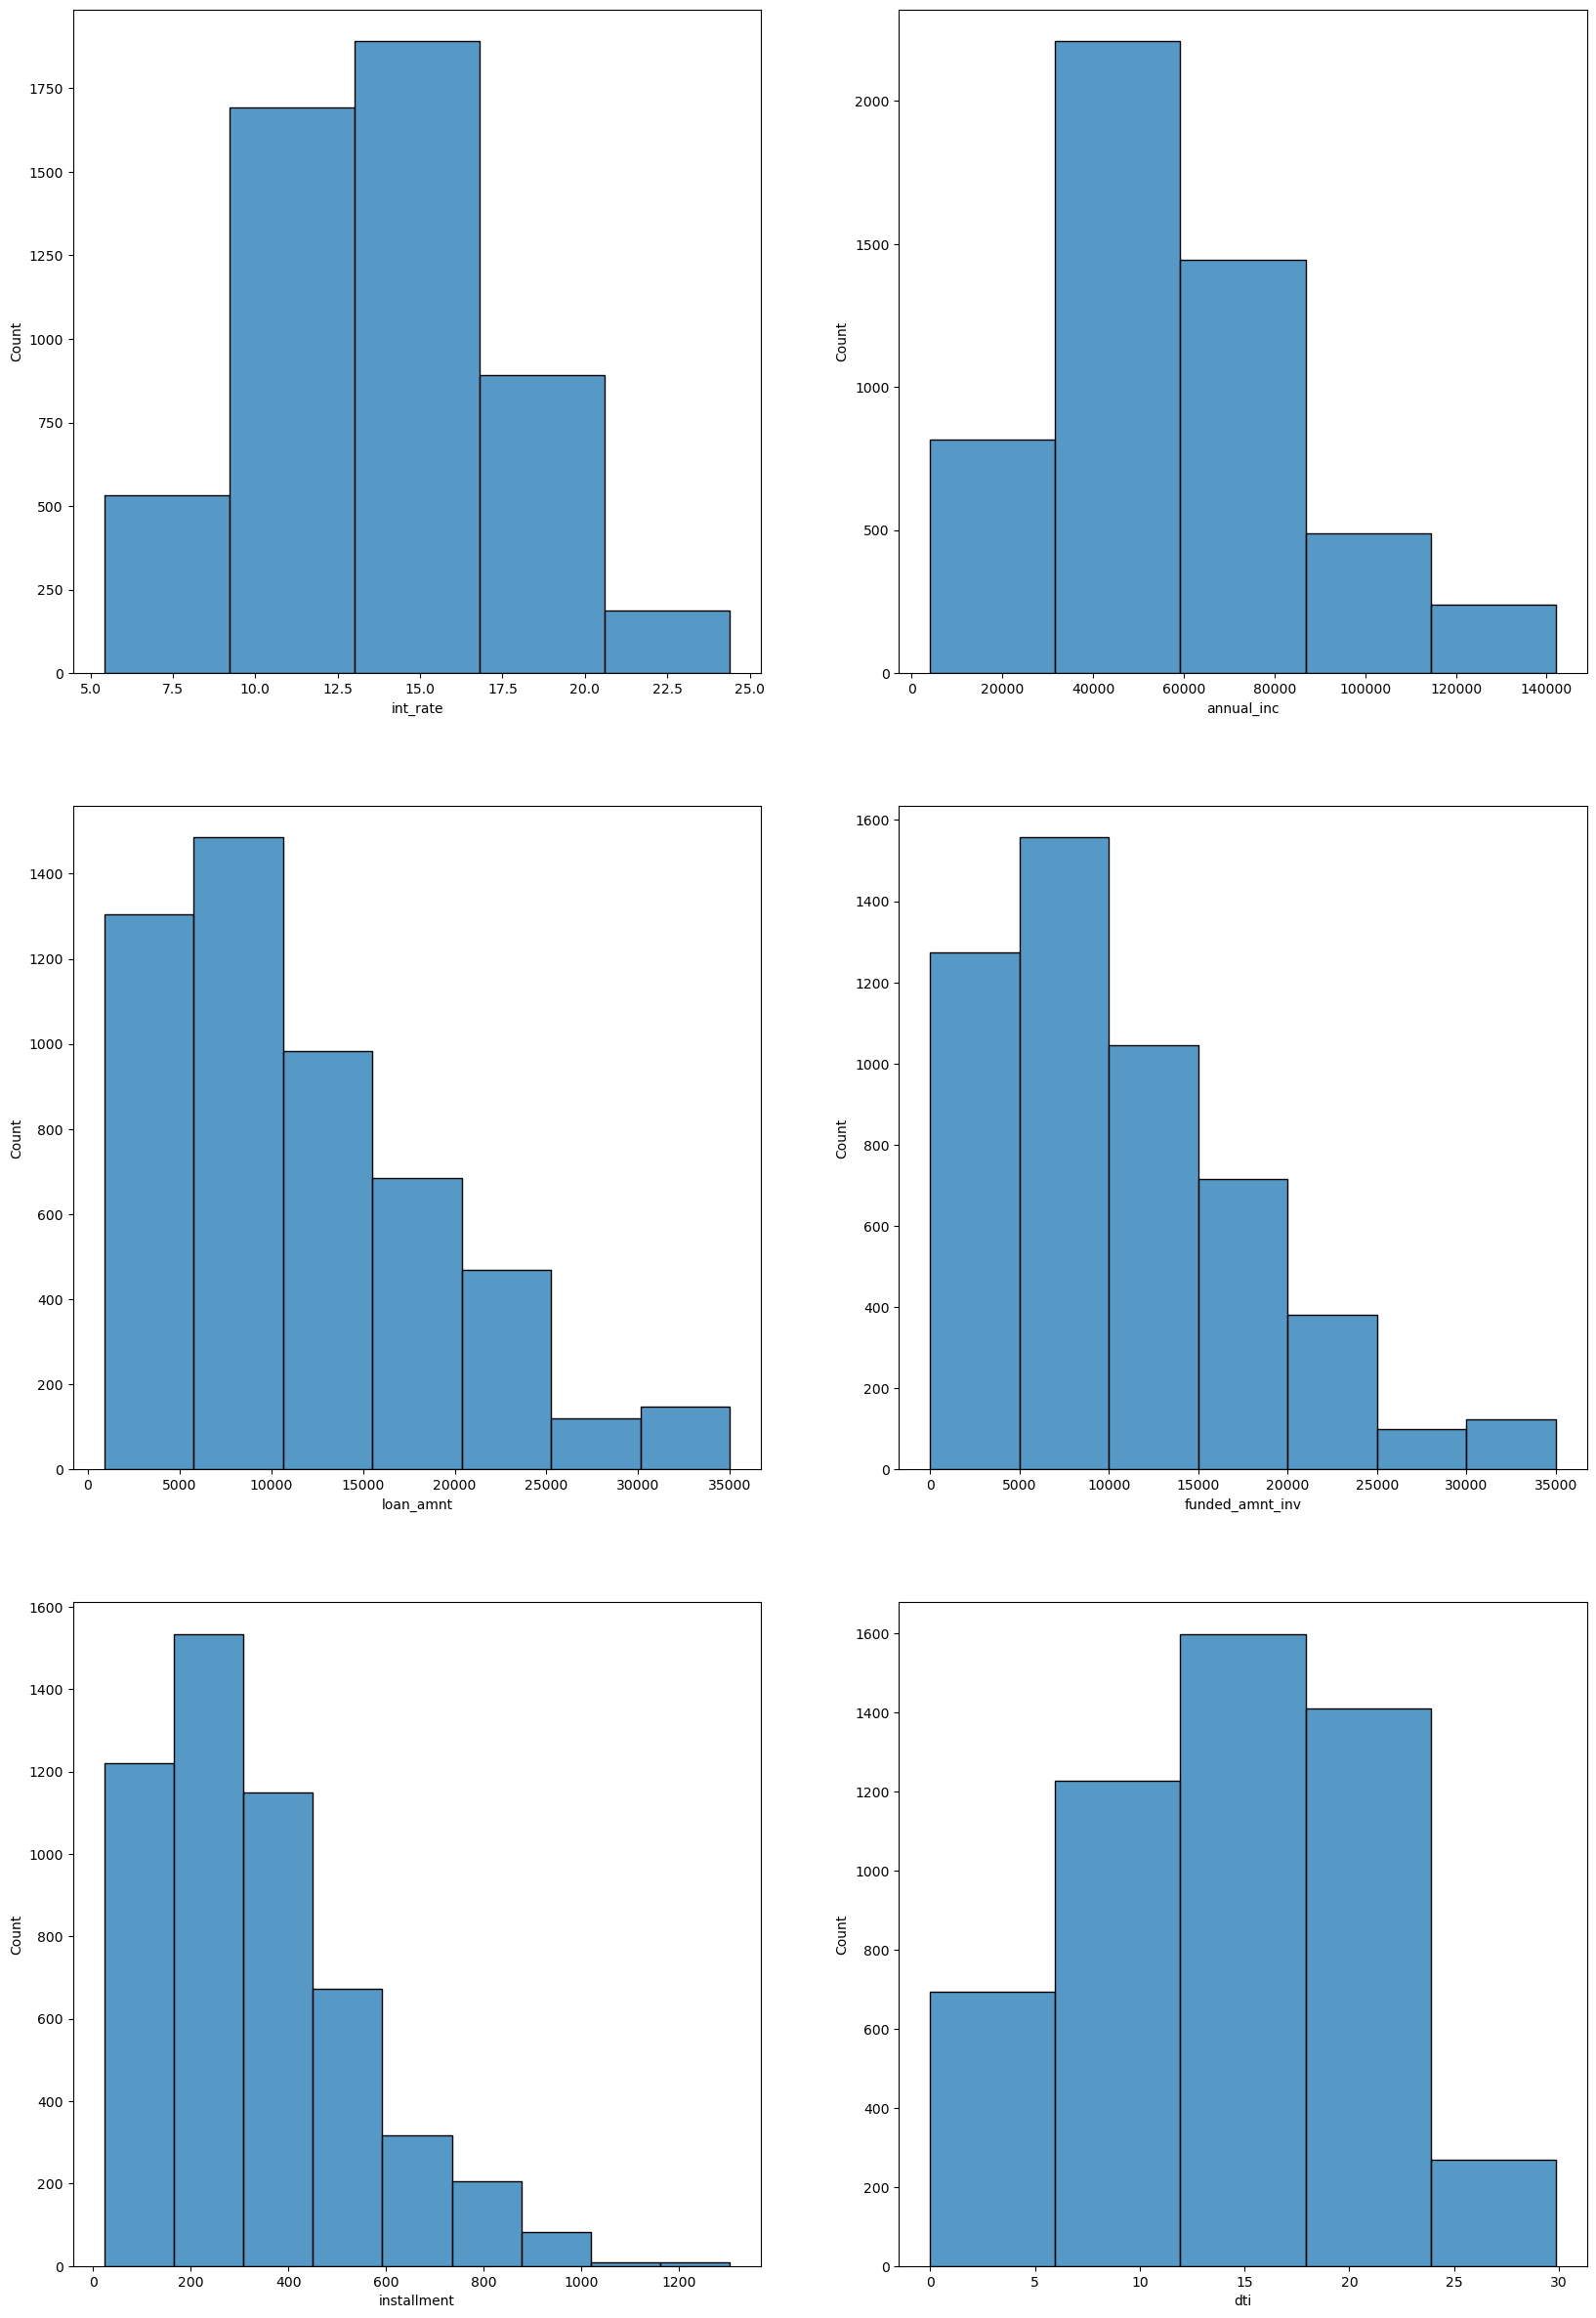

In [51]:
fig, axes = plt.subplots(3,2, figsize=(20, 30))  #subplot of 1X2

sns.histplot( df[df['loan_status'] == 'Charged Off']['int_rate'] , bins= 5 , ax=axes[0,0])

sns.histplot( df[df['loan_status'] == 'Charged Off']['annual_inc'], bins=5 , ax = axes[0,1])

sns.histplot( df[df['loan_status'] == 'Charged Off']['loan_amnt'], bins=7 , ax = axes[1,0])

sns.histplot( df[df['loan_status'] == 'Charged Off']['funded_amnt_inv'], bins=7 , ax = axes[1,1])

sns.histplot( df[df['loan_status'] == 'Charged Off']['installment'], bins=9 , ax = axes[2,0])

sns.histplot( df[df['loan_status'] == 'Charged Off']['dti'], bins=5 , ax = axes[2,1])

plt.show()

In [52]:
df['int_rate'].describe()

count    35675.000000
mean        11.919305
std          3.658499
min          5.420000
25%          8.940000
50%         11.710000
75%         14.350000
max         24.400000
Name: int_rate, dtype: float64

#### For continuous variables , we may also perform binning to perform univariate analysis. 
    1. Prepare buckets(with specific edges) for the int_rate column using pd.cut .
    2. Prepare buckets(with specific edges) for the annual_inc column using pd.cut 

In [53]:
#Note : int_rate varies from 5%-24%
df["int_rate_bucket"] = pd.cut(df['int_rate'],bins=[5, 9, 13, 17, 21,25], labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-25%'])   #cut based on specific bin edges 
df.head()


loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  installment  \
0       5000         5000           4975.0   36 months     10.65       162.87   
1       2500         2500           2500.0   60 months     15.27        59.83   
2       2400         2400           2400.0   36 months     15.96        84.33   
3      10000        10000          10000.0   36 months     13.49       339.31   
5       5000         5000           5000.0   36 months      7.90       156.46   

  grade  sub_grade emp_length home_ownership  annual_inc verification_status  \
0     B          2         10           RENT     24000.0            Verified   
1     C          4          0           RENT     30000.0     Source Verified   
2     C          5         10           RENT     12252.0        Not Verified   
3     C          1         10           RENT     49200.0     Source Verified   
5     A          4          3           RENT     36000.0     Source Verified   

  issue_d  loan_status         purpose    dti int_rate_bucket  
0  Dec-11   Fully Paid     credit_card  27.65          9%-13%  
1  Dec-11  Charged Off             car   1.00         13%-17%  
2  Dec-11   Fully Paid  small_business   8.72         13%-17%  
3  Dec-11   Fully Paid           other  20.00         13%-17%  
5  Dec-11   Fully Paid         wedding  11.20           5%-9%

In [54]:
df['annual_inc'].describe()

count     35675.000000
mean      61458.271977
std       27774.492578
min        4000.000000
25%       40000.000000
50%       57000.000000
75%       78000.000000
max      142000.000000
Name: annual_inc, dtype: float64

In [55]:
#annual_inc varies from 4000 - 140004 , divide in 5 ranges
df["annual_inc_bucket"] = pd.cut(df['annual_inc'],bins=[0,30000,60000,90000,120000,150000], labels =['0k-30k','30k-60k','60k-90k','90k-120k','120k-150k'])   #cut based on specific bin edges 
df.head()


loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  installment  \
0       5000         5000           4975.0   36 months     10.65       162.87   
1       2500         2500           2500.0   60 months     15.27        59.83   
2       2400         2400           2400.0   36 months     15.96        84.33   
3      10000        10000          10000.0   36 months     13.49       339.31   
5       5000         5000           5000.0   36 months      7.90       156.46   

  grade  sub_grade emp_length home_ownership  annual_inc verification_status  \
0     B          2         10           RENT     24000.0            Verified   
1     C          4          0           RENT     30000.0     Source Verified   
2     C          5         10           RENT     12252.0        Not Verified   
3     C          1         10           RENT     49200.0     Source Verified   
5     A          4          3           RENT     36000.0     Source Verified   

  issue_d  loan_status         purpose    dti int_rate_bucket  \
0  Dec-11   Fully Paid     credit_card  27.65          9%-13%   
1  Dec-11  Charged Off             car   1.00         13%-17%   
2  Dec-11   Fully Paid  small_business   8.72         13%-17%   
3  Dec-11   Fully Paid           other  20.00         13%-17%   
5  Dec-11   Fully Paid         wedding  11.20           5%-9%   

  annual_inc_bucket  
0            0k-30k  
1            0k-30k  
2            0k-30k  
3           30k-60k  
5           30k-60k

#### Plot the count plot for int_rate_bucket and annual_inc_bucket  for Charged Off loan

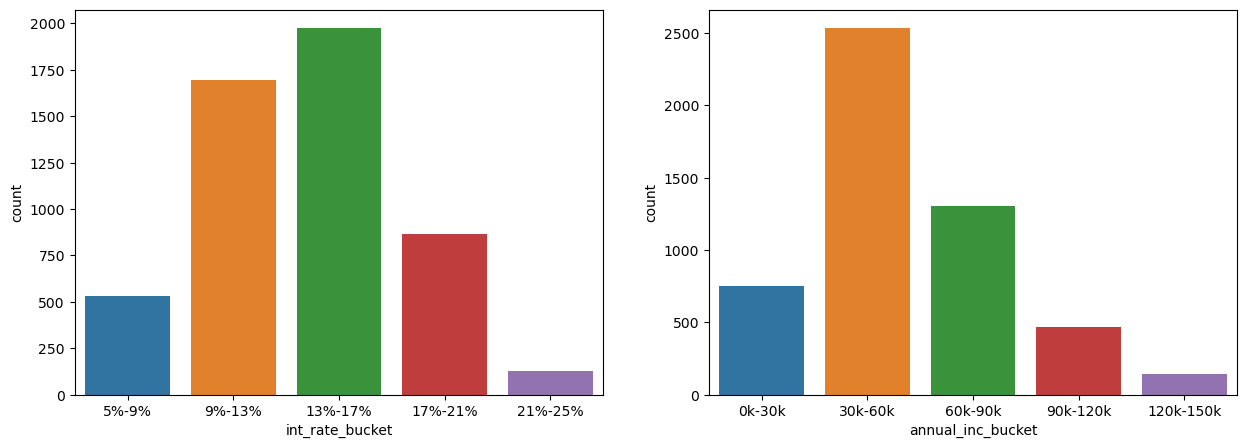

In [56]:
fig, axes = plt.subplots(1,2, figsize=(15, 5))  #subplot of 1X2
sns.countplot( df[df['loan_status'] == 'Charged Off']['int_rate_bucket'] , ax=axes[0] )

sns.countplot( df[df['loan_status'] == 'Charged Off']['annual_inc_bucket'], ax = axes[1] )
plt.show()

## <font color='blue'> Insights from above graphs : </font>
    1. If interest rate is 13%-17% -  applicant is more likely to be defaulter.
    2. If annual income is in range of 30k-60k , he is more likely to be defaulter
    3. If loan amount is 6k-11k - applicant is more likely to be defaulter.
    4. If funded amount by investors : 5k-10k - applicant is more likely to be defaulter.
    5. If the probable monthly installment is ~150-300 , he is more likely to be defaulter.
    6. If the dti is in range of 12-18, he is more likely to be defaulter.
 

In [57]:
df.info()
df['issue_d'].head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35675 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   loan_amnt            35675 non-null  int64   
 1   funded_amnt          35675 non-null  int64   
 2   funded_amnt_inv      35675 non-null  float64 
 3   term                 35675 non-null  object  
 4   int_rate             35675 non-null  float64 
 5   installment          35675 non-null  float64 
 6   grade                35675 non-null  object  
 7   sub_grade            35675 non-null  int64   
 8   emp_length           35675 non-null  object  
 9   home_ownership       35675 non-null  object  
 10  annual_inc           35675 non-null  float64 
 11  verification_status  35675 non-null  object  
 12  issue_d              35675 non-null  object  
 13  loan_status          35675 non-null  object  
 14  purpose              35675 non-null  object  
 15  dti                

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

### Create some more Derived Columns based on issue_d
    -Extract Month and Year from Dec-11 type format

In [58]:
#Extract Month
df['issue_month'] = df['issue_d'].apply(lambda x: str(x).split('-')[0] ) 

#Extract Year
df['issue_year'] = df['issue_d'].apply(lambda x: '20' + str(x).split('-')[1] )
df.head()


loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  installment  \
0       5000         5000           4975.0   36 months     10.65       162.87   
1       2500         2500           2500.0   60 months     15.27        59.83   
2       2400         2400           2400.0   36 months     15.96        84.33   
3      10000        10000          10000.0   36 months     13.49       339.31   
5       5000         5000           5000.0   36 months      7.90       156.46   

  grade  sub_grade emp_length home_ownership  annual_inc verification_status  \
0     B          2         10           RENT     24000.0            Verified   
1     C          4          0           RENT     30000.0     Source Verified   
2     C          5         10           RENT     12252.0        Not Verified   
3     C          1         10           RENT     49200.0     Source Verified   
5     A          4          3           RENT     36000.0     Source Verified   

  issue_d  loan_status         purpose    dti int_rate_bucket  \
0  Dec-11   Fully Paid     credit_card  27.65          9%-13%   
1  Dec-11  Charged Off             car   1.00         13%-17%   
2  Dec-11   Fully Paid  small_business   8.72         13%-17%   
3  Dec-11   Fully Paid           other  20.00         13%-17%   
5  Dec-11   Fully Paid         wedding  11.20           5%-9%   

  annual_inc_bucket issue_month issue_year  
0            0k-30k         Dec       2011  
1            0k-30k         Dec       2011  
2            0k-30k         Dec       2011  
3           30k-60k         Dec       2011  
5           30k-60k         Dec       2011

#### Analyze issue_month using bar plot

<AxesSubplot:>

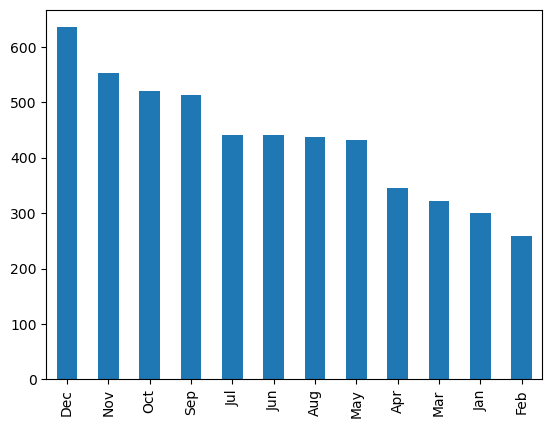

In [59]:

df[df['loan_status'] == 'Charged Off']['issue_month'].value_counts().plot.bar()


####  OR Analyze both issue_year and issue_date using sns countplot

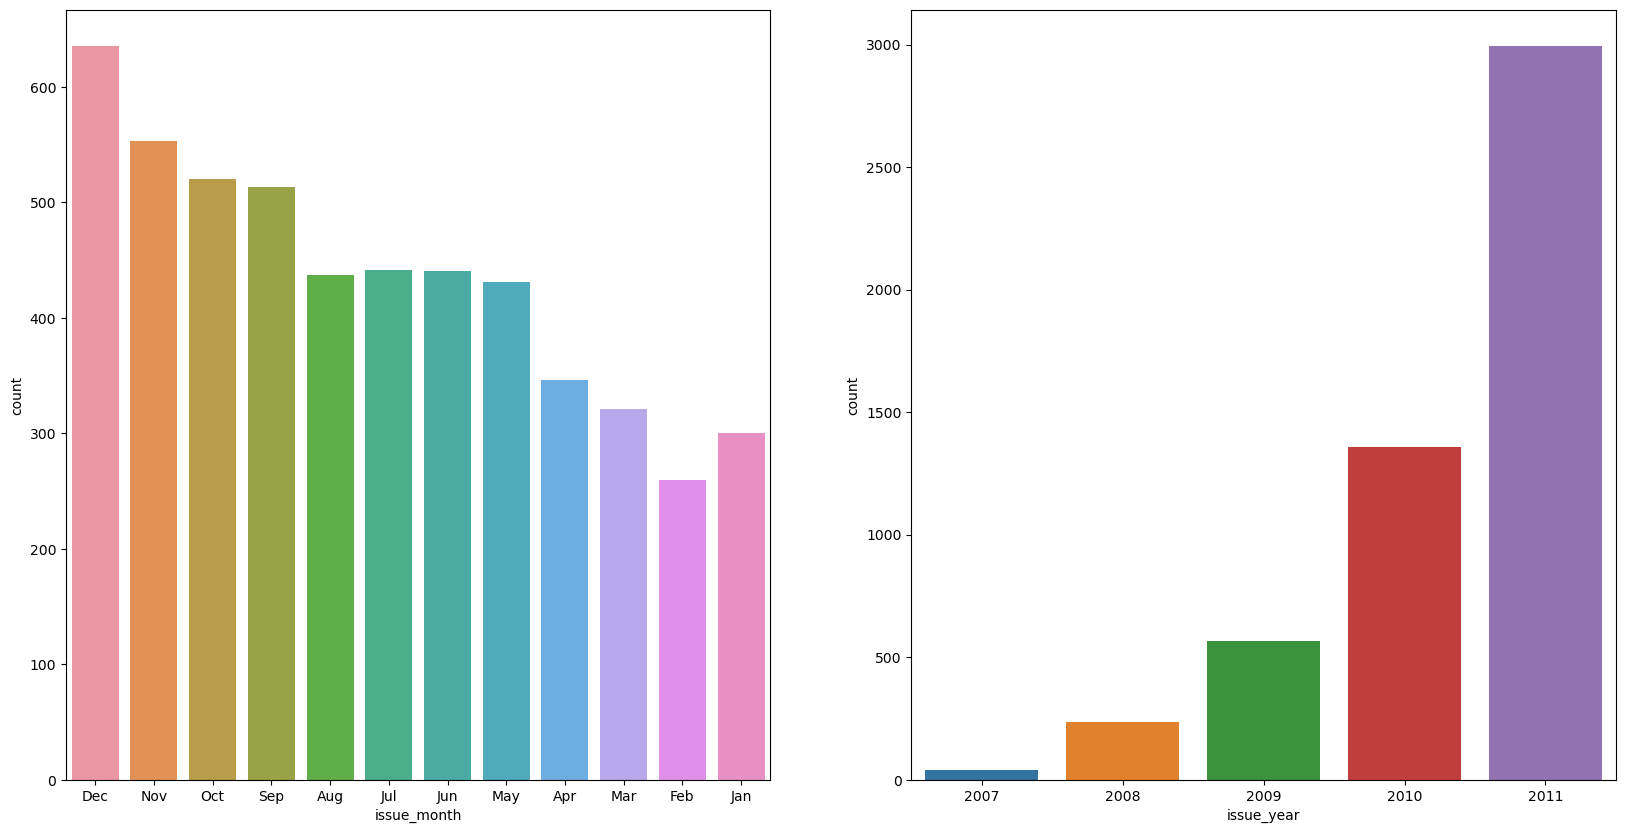

In [60]:

fig, axes = plt.subplots(1,2, figsize=(20, 10))  #subplot of 1X2

sns.countplot( df[df['loan_status'] == 'Charged Off']['issue_month'] , ax=axes[0])  #Note: If loan issued on Dec , will result in highest defaulters

sns.countplot( df[df['loan_status'] == 'Charged Off']['issue_year'], ax = axes[1] , order=['2007','2008','2009','2010','2011'])

plt.show()

## <font color='blue'> Insights from above graphs : </font>
    1. Loan issued in Year end months like Nov,Dec have high chances to be defaulter.
    2. 2011 year has produced the highest defaulters so far.
    
 

#  Observation with univariate analysis so far .....
    Note: Analysis represent how single variable are related with Charged Off loan [Defaulters]. 
    More chance of being defaulter when:
        
 #### Categorical Variables (Check count/bar plots) : 
     - term : 60 months
     - grade : B 
     - sub_grade : B5
     - emp_length : Employment Length is 10+ years
     - home_ownership : RENT
     - verification_status : Not Verified
     - issue_d : Year end months have high chances like Dec , Nov 
     - purpose : when purpose is 'debt_consolidation'
     - int_rate_bucket : When applicant has 13%-17% interest on this loan
     - annual_inc_bucket : When applicant has annual income of 30k -60k
      
 #### Numerical Variables (Check hist plot) :
     - loan_amnt : ~ 6k-11k
     - funded_amnt_inv : 5k-10k
     - int_rate : 13%-17%
     - installment : When monthly installment is ~150-300
     - annual_inc : ~31k - 59k
     - dti : 12-18
     

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35675 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   loan_amnt            35675 non-null  int64   
 1   funded_amnt          35675 non-null  int64   
 2   funded_amnt_inv      35675 non-null  float64 
 3   term                 35675 non-null  object  
 4   int_rate             35675 non-null  float64 
 5   installment          35675 non-null  float64 
 6   grade                35675 non-null  object  
 7   sub_grade            35675 non-null  int64   
 8   emp_length           35675 non-null  object  
 9   home_ownership       35675 non-null  object  
 10  annual_inc           35675 non-null  float64 
 11  verification_status  35675 non-null  object  
 12  issue_d              35675 non-null  object  
 13  loan_status          35675 non-null  object  
 14  purpose              35675 non-null  object  
 15  dti                

## Bivariate Analysis ....... Analyze the two variables together and see their impact on Charged Off loan

#### Quick analysis of numerical variables against each other using pair plot. 

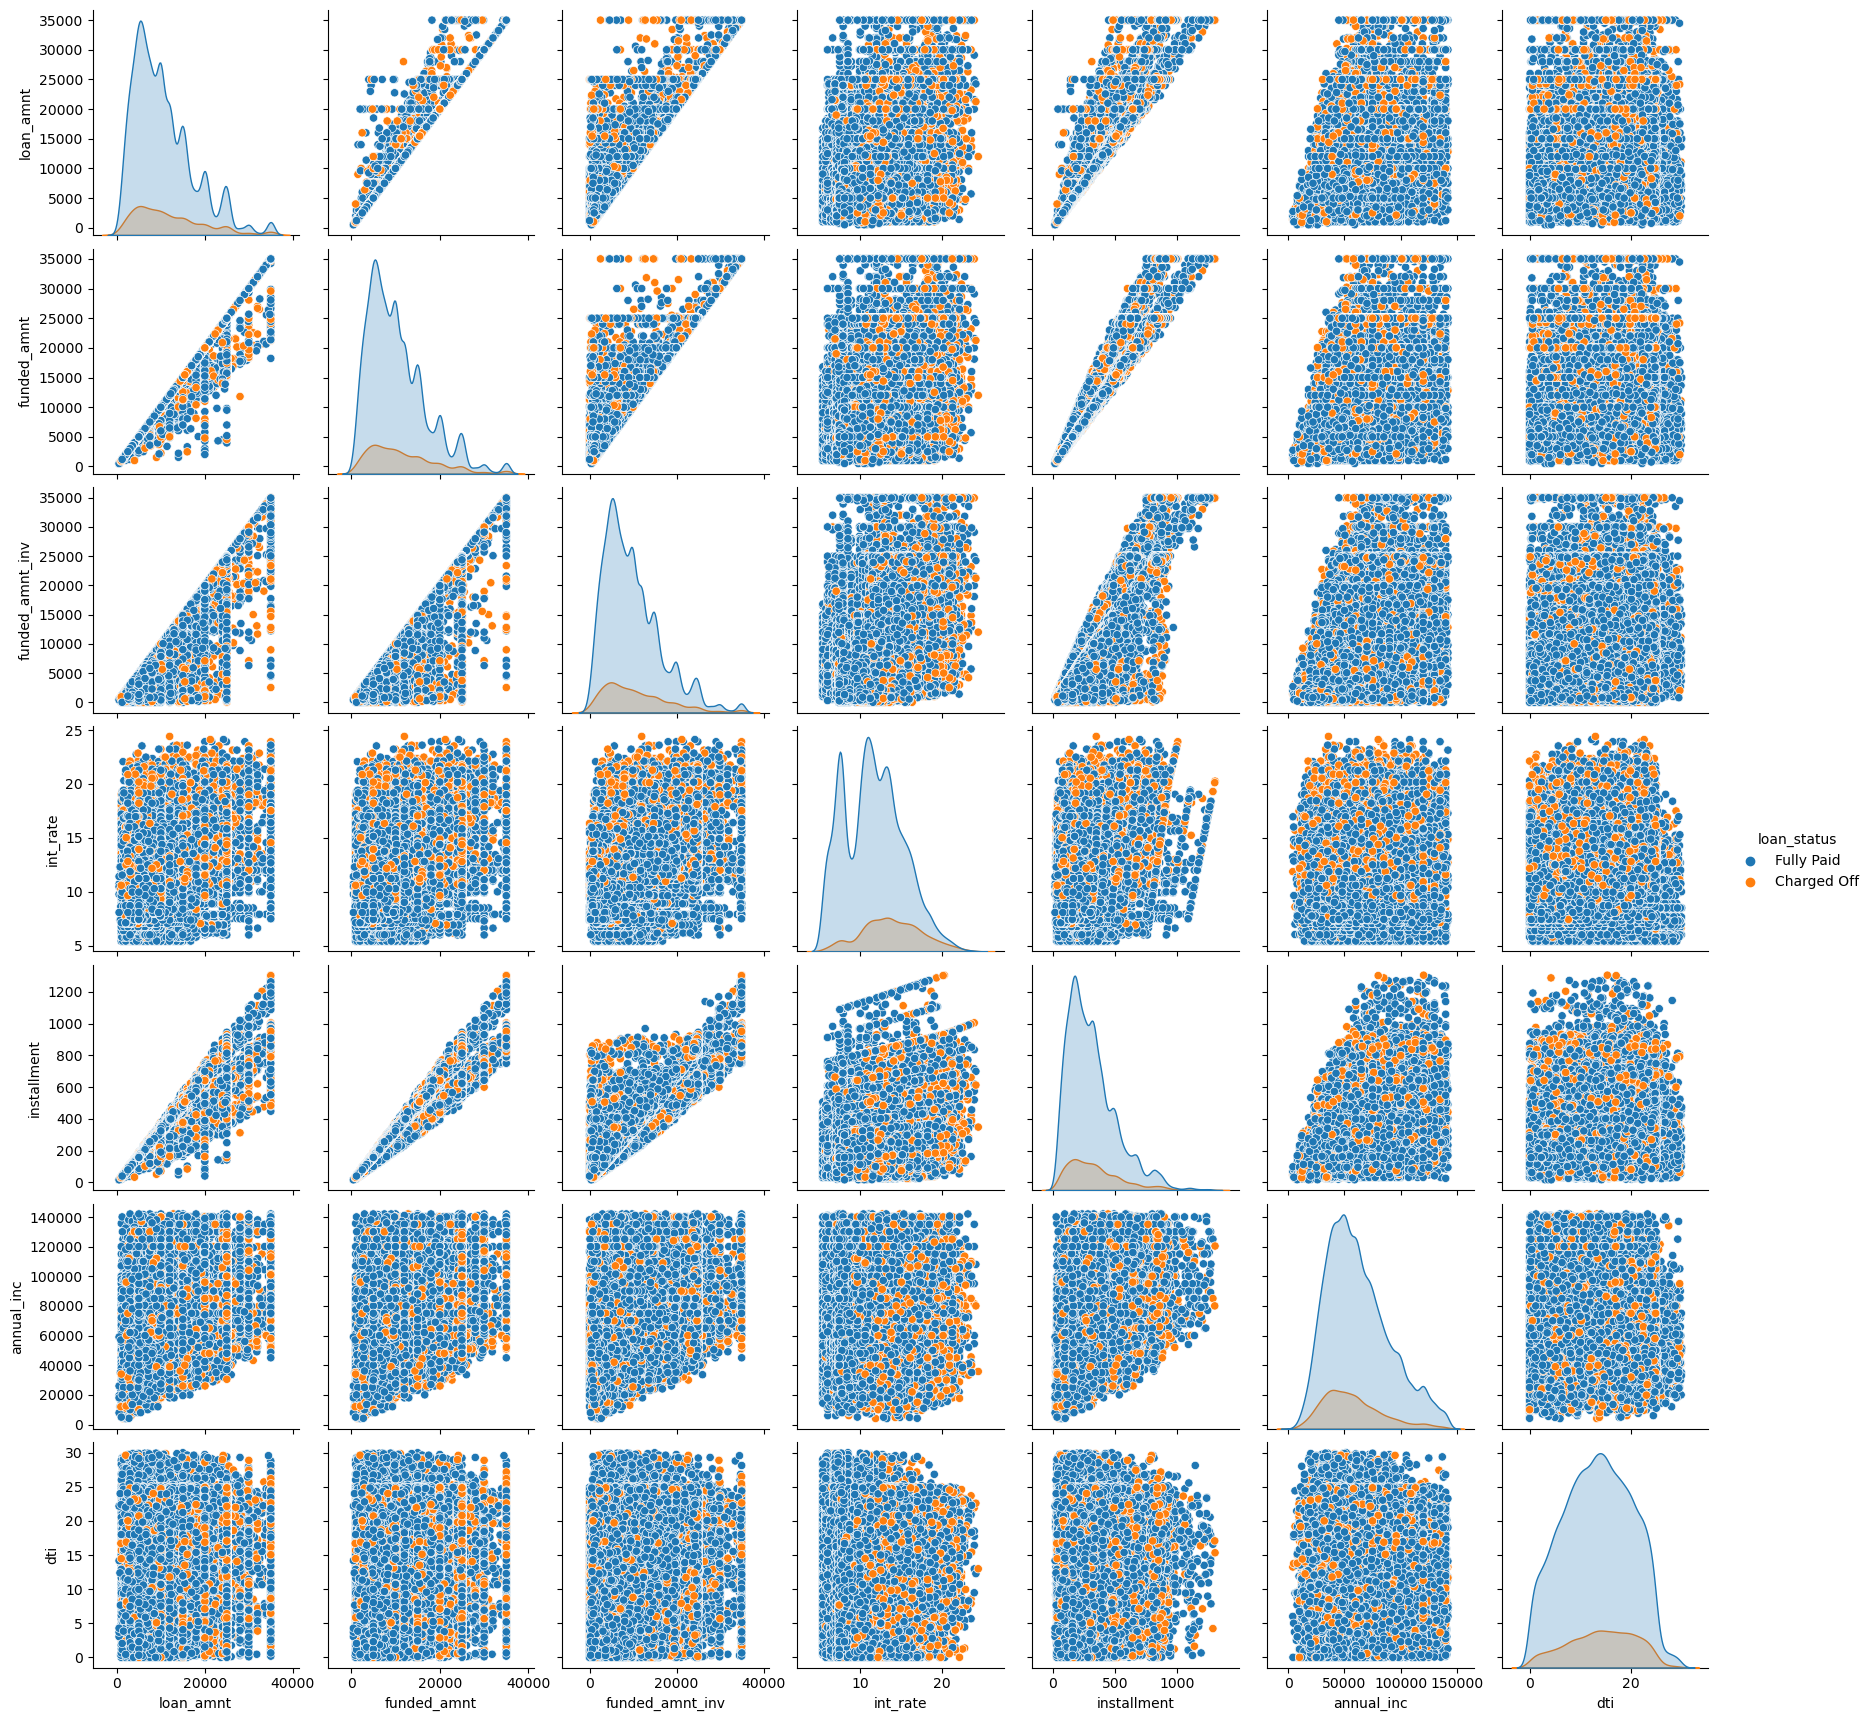

In [62]:
sns.pairplot(df, vars=['loan_amnt', 'funded_amnt','funded_amnt_inv','int_rate','installment','annual_inc','dti'] , hue='loan_status')
plt.show()

#### Note :
    1. With above graph we only get some idea of different numerical variables relationship.
    2. But we can not infer much so instead do some analysis :
        - using binned numerical varaibles vs numerical variable
        - using categorical variables vs numerical variable
   

 #### Bivariate Analysis of loan_amount wrt to other variables :
 
    - Check loan_amount with int_rate (Both variables are continous numerical variable ) 
    - Check loan_amount with grade ( grade is  categorical - use barplot )
    - Check loan_amount with home_ownership ( home_ownership is categorical - use barplot ) 
    - Check loan_amount with purpose ( purpose is categorical - use barplot )
    - Check loan_amount with month issued and year issued ( Both month and year are categorical - use barplot )
    - Check loan_amount with emp_length ( emp_length is categorical - use barplot )
    - Check loan_amount with verificaiton_status ( verificaiton_status is categorical - use barplot )

####  Check loan_amount with int_rate (Both variables are continous numerical variable )

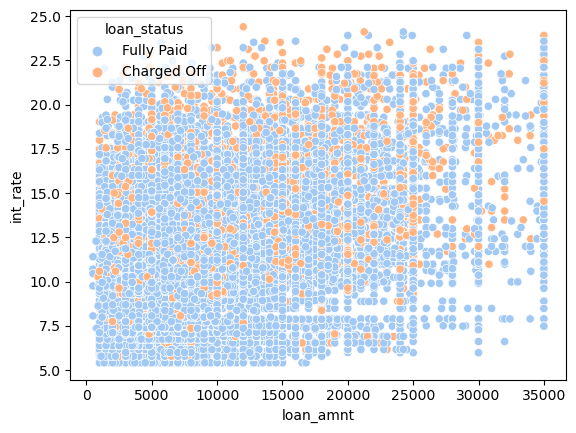

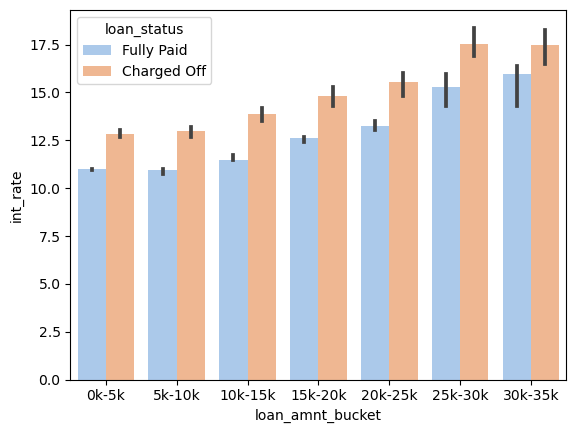

In [63]:
sns.scatterplot(df['loan_amnt'], df['int_rate'], hue =df['loan_status'],palette="pastel") #Nothing useful can be inferred from below scatter plot graph
plt.show()
#Note : scatter plot - use for continous numerical value and bar/count plot for categorical variables

# Try to make 'loan_amnt' categorical by binning the data
#Prepare buckets(with specific edges) for the loan_amnt column using pd.cut .
df["loan_amnt_bucket"] = pd.cut(df['loan_amnt'],bins=[0, 5000, 10000, 15000, 20000,25000,30000,35000], labels=['0k-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])   #cut based on specific bin edges to make this categorical instead of continuous data 

#Now analyze the data again using bar plot . Note: By default y axis data is mean int_rate
sns.barplot(df['loan_amnt_bucket'], df['int_rate'], hue =df['loan_status'],palette="pastel" , estimator=np.median )
plt.show()


####  Check loan_amount with grade

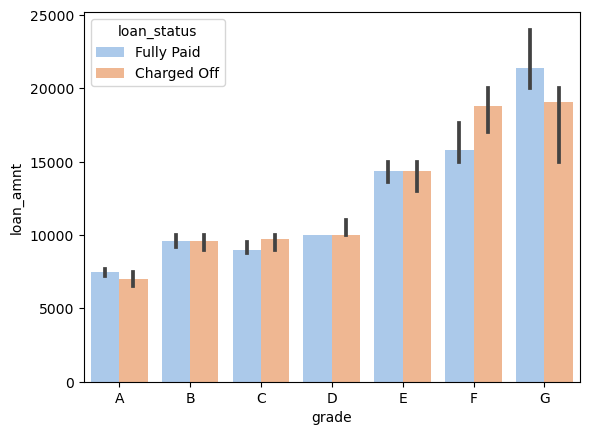

In [64]:
#Analyze using barplot as this is categorical variable
sns.barplot( df['grade'] , df['loan_amnt'], hue =df['loan_status'] , palette="pastel", order=['A','B','C','D','E','F','G'] , estimator= np.median)
plt.show()


## <font color='blue'> Insights from above graphs : </font>
    1. Applicants who have taken loan in the range of 25k with charged interest rate of 15%-17.5% are more likely to be default.
    2. Loan amount > 15k and Grade is F - more likely to be default.


#### Check loan_amount with home_ownership ( home_ownership is categorical - use barplot ) 

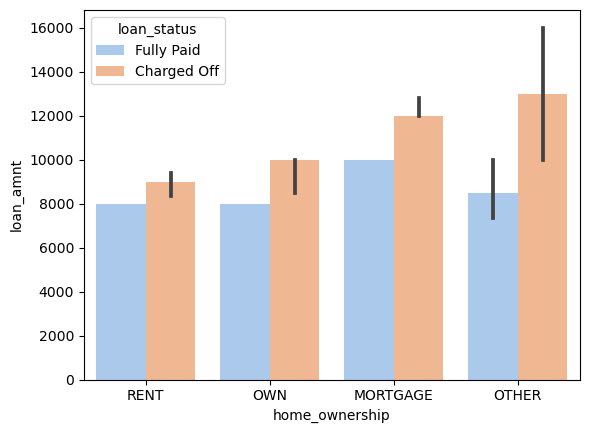

In [65]:
#Analyze the data again using bar plot. y axis has loan_amont with median
sns.barplot(df['home_ownership'], df['loan_amnt'], hue =df['loan_status'],palette="pastel" , estimator=np.median)
plt.show()


## <font color='blue'> Insights from above graph : </font>
    1. Applicants who have taken loan above 10k and have home_ownership as MORTGAGE and OTHER - Have more chances to be default.


#### Check loan_amount with purpose ( purpose is categorical - use barplot )

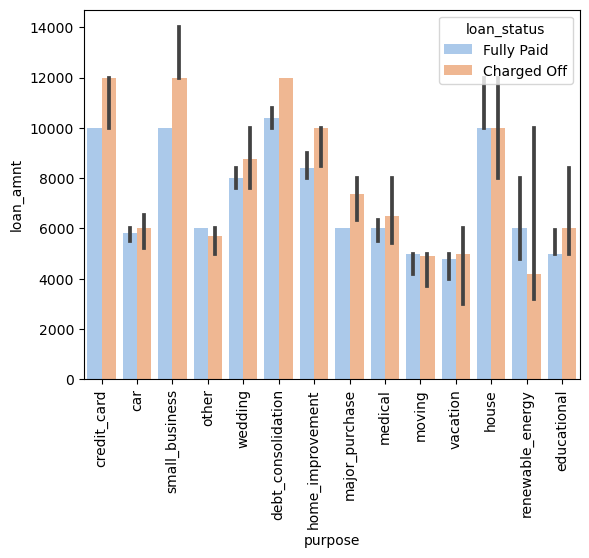

In [66]:
#Analyze the data again using bar plot.
sns.barplot(df['purpose'], df['loan_amnt'], hue =df['loan_status'],palette="pastel" , estimator=np.median)
plt.xticks(rotation = 90)
plt.show()


## <font color='blue'> Insights from above graphs : </font>
    1. Applicants who have taken a loan for purpose as small business,credit_card, debt_consilidation and the loan amount > 10k are more likely to be default.


#### Check loan_amount with month issued and year issued

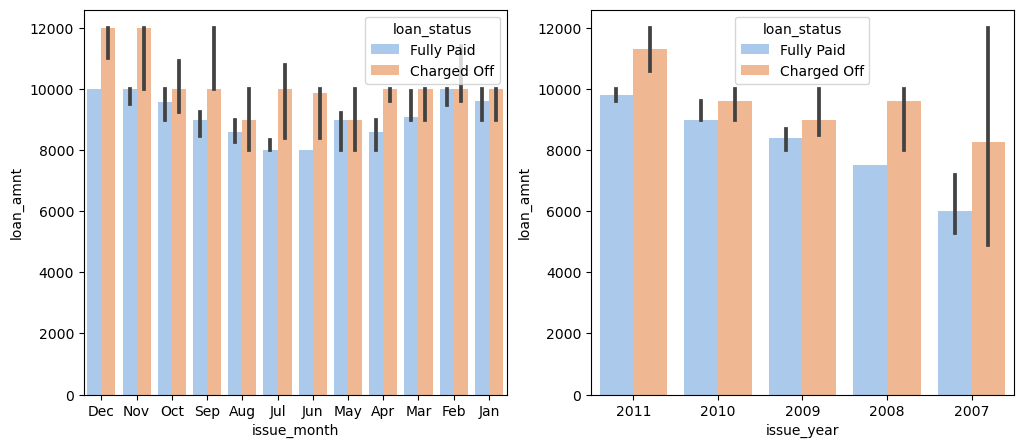

In [67]:
fig, axes = plt.subplots(1,2, figsize=(12, 5))  #subplot of 1X2  (w*h)
plt.subplot(121)
sns.barplot(df['issue_month'], df['loan_amnt'] , hue =df['loan_status'], palette="pastel" , estimator=np.median)
plt.subplot(122)
sns.barplot(df['issue_year'], df['loan_amnt'], hue =df['loan_status'],palette="pastel" , estimator=np.median )

plt.show()

## <font color='blue'> Insights from above graphs : </font>
    1. Applicants who have taken a loan > 10k and applied in month of Nov and Dec are more likely to be default.


#### Check loan_amount with emp_length and verification_status

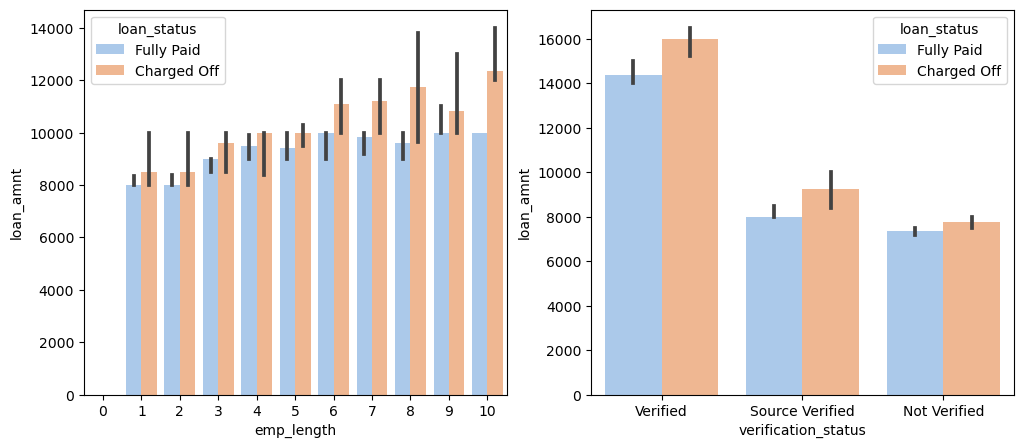

In [68]:
fig, axes = plt.subplots(1,2, figsize=(12, 5))  #subplot of 1X2  (w*h)
plt.subplot(121)
sns.barplot(df['emp_length'], df['loan_amnt'] , hue =df['loan_status'], palette="pastel" , estimator=np.median ,order=['0','1','2','3','4', '5','6' ,'7','8','9','10'])
plt.subplot(122)
sns.barplot(df['verification_status'], df['loan_amnt'], hue =df['loan_status'],palette="pastel" , estimator=np.median )

plt.show()

## <font color='blue'> Insights from above graphs : </font>
    1. Applicants who have taken a loan > 10k and emp length >= 10 years are more likely to be default.


## Continue Bivaraite Analysis ... for annual_income  with other columns:

    - Check annual_income with int_rate (Both variables are continous numerical variable ) 
    - Check annual_income with loan_amount (Both variables are continous numerical variable ) 
    - Check annual_income with grade ( grade is  categorical - use barplot )
    - Check annual_income with home_ownership ( home_ownership is categorical - use barplot ) 
    - Check annual_income with purpose ( purpose is categorical - use barplot )
    - Check annual_income with month issued and year issued ( Both month and year are categorical - use barplot )
    - Check annual_income with emp_length ( emp_length is categorical - use barplot )
    - Check annual_income with verificaiton_status ( verificaiton_status is categorical - use barplot )
    

####  Check annual_income with int_rate (Both variables are continous numerical variable )

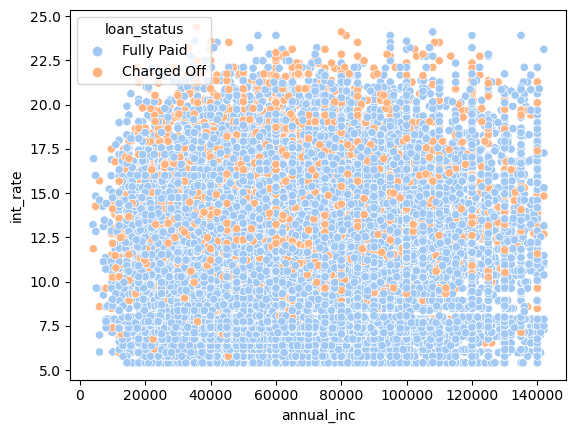

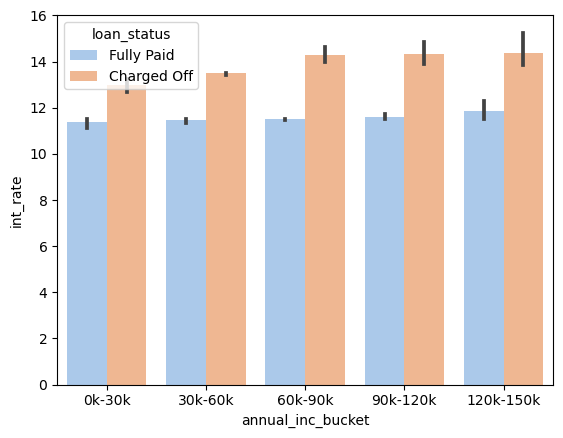

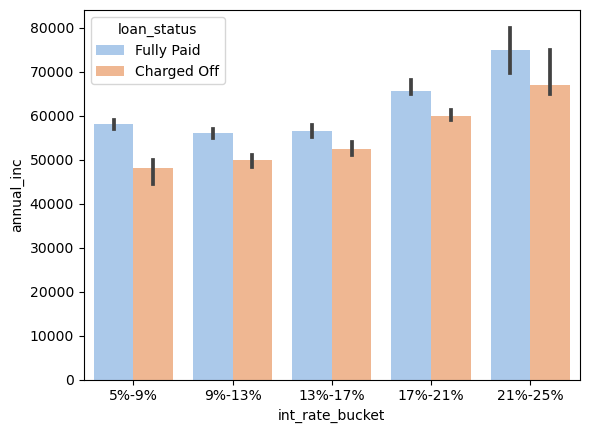

In [69]:
sns.scatterplot(df['annual_inc'], df['int_rate'], hue =df['loan_status'],palette="pastel") #Nothing useful can be inferred from below scatter plot graph
plt.show()

# Try to make 'annual_inc' categorical by binning the data => annual_inc_bucket is already created
#Now analyze the data again using bar plot.
sns.barplot(df['annual_inc_bucket'], df['int_rate'], hue =df['loan_status'],palette="pastel" , estimator=np.median)
plt.show()

sns.barplot(df['int_rate_bucket'], df['annual_inc'], hue =df['loan_status'],palette="pastel" , estimator=np.median)
plt.show()


## <font color='blue'> Insights from above graphs : </font>
    1. Applicants who has interest rate > 11.5 across all income group have more chances to be default.


####  Check annual_inc with loan_amount

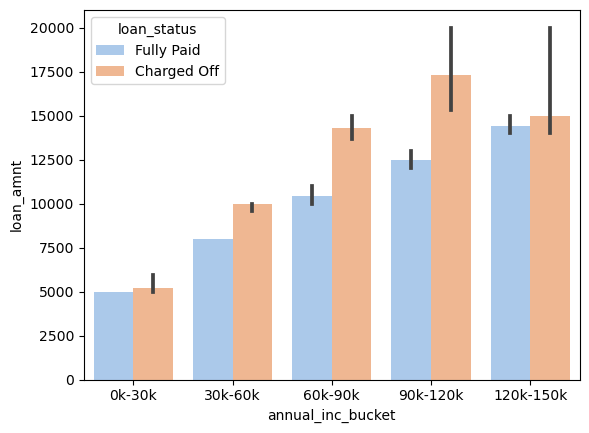

In [70]:
#Analyze using barplot as loan_amount_bucket is categorical variable
sns.barplot( df['annual_inc_bucket'] , df['loan_amnt'], hue =df['loan_status'] , palette="pastel", order=['0k-30k','30k-60k','60k-90k','90k-120k','120k-150k'] , estimator=np.median)
plt.show()



## <font color='blue'> Insights from above graphs : </font>
    1. Applicants who has annual income in range of 90k-120k and applied loan of amount > 12.5k have more chances to be default.


####  Check annual_inc with grade

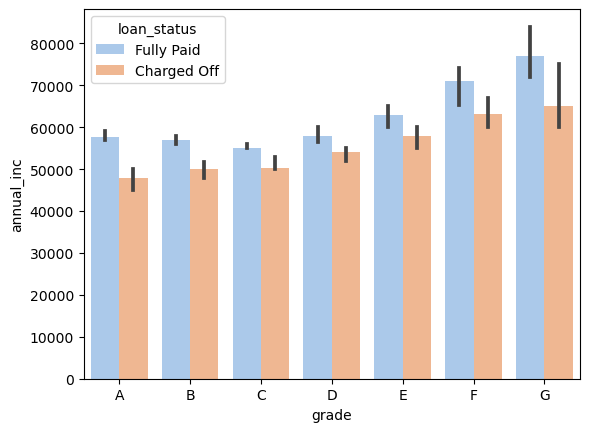

In [71]:
#Analyze using barplot as this is categorical variable
sns.barplot( df['grade'] , df['annual_inc'], hue =df['loan_status'] , palette="pastel", order=['A','B','C','D','E','F','G'] , estimator=np.median)
plt.show()


#### Check annual_inc with home_ownership ( home_ownership is categorical - use barplot ) 

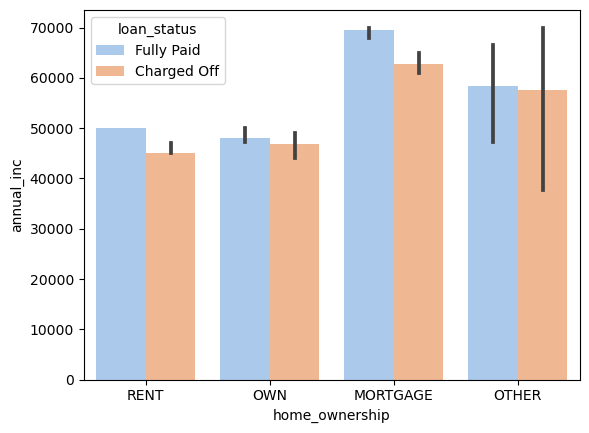

In [72]:
#Analyze the data again using bar plot. y axis has annual_inc with median
sns.barplot(df['home_ownership'], df['annual_inc'], hue =df['loan_status'],palette="pastel", estimator=np.median)
plt.show()


## <font color='blue'> Insights from above graphs : </font>
    1. Applicants who has annual income >50k and home_ownership as Mortgage and Other have more chances to be default as compared to RENT and OWN.


#### Check annual_inc with purpose ( purpose is categorical - use barplot )

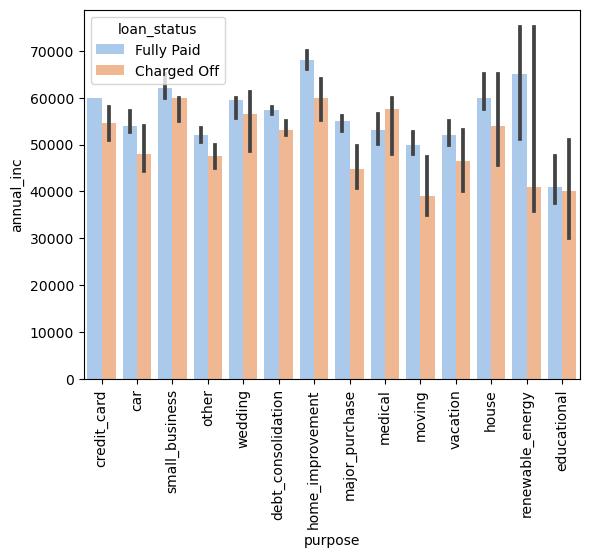

In [73]:
#Analyze the data again using bar plot.
sns.barplot(df['purpose'], df['annual_inc'], hue =df['loan_status'],palette="pastel" , estimator=np.median)
plt.xticks(rotation = 90)
plt.show()


## <font color='blue'> Insights from above graph : </font>
    1. Applicants who has annual income >55k and applied purpose is small_business and home_improvement are more likely to be default.


#### Check annual_inc with month issued and year issued

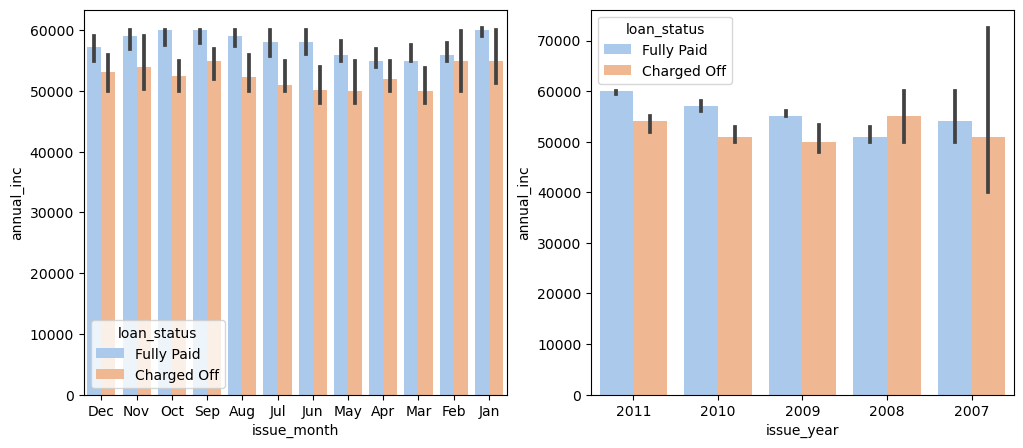

In [74]:
fig, axes = plt.subplots(1,2, figsize=(12, 5))  #subplot of 1X2  (w*h)
plt.subplot(121)
sns.barplot(df['issue_month'], df['annual_inc'] , hue =df['loan_status'], palette="pastel" , estimator=np.median)
plt.subplot(122)
sns.barplot(df['issue_year'], df['annual_inc'], hue =df['loan_status'],palette="pastel" , estimator=np.median )

plt.show()

## <font color='blue'> Insights from above graph : </font>
    1. Median income of applicants who are defaulted is always less than who are not defaulted.

#### Check annual_inc with verification_status

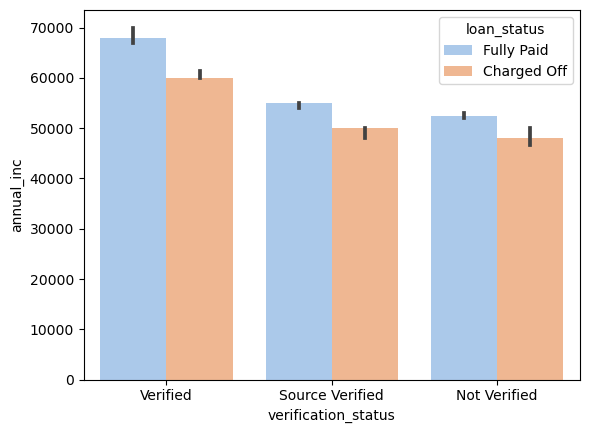

In [75]:

sns.barplot(df['verification_status'], df['annual_inc'], hue =df['loan_status'],palette="pastel" , estimator=np.median )

plt.show()

## <font color='blue'> Insights from above graph : </font>
    1. Median income of applicants who are defaulted is always less than who are not defaulted across all verification_status
    

#  Observation with bivariate analysis .....
    Note: Analysis represent how two variables are related with Charged Off loan [Defaulters]. 
    More chance of being defaulter when:
        
        1. Applicants who have taken loan in the range of 25k with charged interest rate of 15%-17.5% are more likely to be default.
        2. Loan amount > 15k and Grade is F - more likely to be default.
        3. Applicants who have taken loan above 10k and have home_ownership as MORTGAGE and OTHER - Have more chances to be default.
        4. Applicants who have taken a loan for purpose as small business,credit_card, debt_consilidation and the loan amount > 10k are more likely to be default.
        5.Applicants who have taken a loan > 10k and applied in month of Nov and Dec are more likely to be default.
        6. Applicants who have taken a loan > 10k and emp length >= 10 years are more likely to be default.
        7. Applicants who has interest rate > 11.5 across all income group have more chances to be default.
        8. Applicants who has annual income in range of 90k-120k and applied loan of amount > 12.5k have more chances to be default.
        9. Applicants who has annual income >50k and home_ownership as Mortgage and Other have more chances to be default as compared to RENT and OWN.
        10.Applicants who has annual income >55k and applied purpose is small_business and home_improvement are more likely to be default.
